In [129]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "housing-price-dataset"

# **Import**

In [130]:
library(ggplot2)
library(dplyr)
library(psych)
library(ggcorrplot)
library(gridExtra)

# **1. Data Import & Structure**

In [131]:
data <- read.csv('/kaggle/input/housing-price-dataset/Housing.csv')

In [132]:
str(data)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.23e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  231300 538000 180000 604000 510000 ...
 $ bedrooms     : int  2 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

In [133]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,21613,4.580306e+09,2.876570e+09,3.90493e+09,4.500020e+09,3.561991e+09,1000102.0000,9.900000e+09,9.899000e+09,0.2432928,-1.2606958,1.956669e+07
date*,2,21613,1.782999e+02,1.095037e+02,1.68000e+02,1.766391e+02,1.438122e+02,1.0000,3.720000e+02,3.710000e+02,0.1472652,-1.2712308,7.448539e-01
price,3,21613,5.400886e+05,3.671268e+05,4.50000e+05,4.817040e+05,2.223900e+05,75000.0000,7.700000e+06,7.625000e+06,4.0235218,34.5739151,2.497230e+03
bedrooms,4,21613,3.370795e+00,9.301052e-01,3.00000e+00,3.337979e+00,1.482600e+00,0.0000,3.300000e+01,3.300000e+01,1.9737537,49.0381228,6.326660e-03
bathrooms,5,21613,2.114757e+00,7.701632e-01,2.25000e+00,2.074649e+00,7.413000e-01,0.0000,8.000000e+00,8.000000e+00,0.5110366,1.2789328,5.238720e-03
sqft_living,6,21613,2.079900e+03,9.184409e+02,1.91000e+03,1.984399e+03,8.006040e+02,290.0000,1.354000e+04,1.325000e+04,1.4713512,5.2408399,6.247319e+00
sqft_lot,7,21613,1.510697e+04,4.142051e+04,7.61800e+03,8.259527e+03,3.881447e+03,520.0000,1.651359e+06,1.650839e+06,13.0582062,284.9849447,2.817461e+02
floors,8,21613,1.494309e+00,5.399889e-01,1.50000e+00,1.452085e+00,7.413000e-01,1.0000,3.500000e+00,2.500000e+00,0.6160912,-0.4851211,3.673054e-03
waterfront,9,21613,7.541757e-03,8.651720e-02,0.00000e+00,0.000000e+00,0.000000e+00,0.0000,1.000000e+00,1.000000e+00,11.3835277,127.5906058,5.884979e-04


In [134]:
summary(data)

       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540089   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

**Check missing value**

In [135]:
colSums(is.na(data))

id          date         price      bedrooms     bathrooms 
            0             0             0             0             0 
  sqft_living      sqft_lot        floors    waterfront          view 
            0             0             0             0             0 
    condition         grade    sqft_above sqft_basement      yr_built 
            0             0             0             0             0 
 yr_renovated       zipcode           lat          long sqft_living15 
            0             0             0             0             0 
   sqft_lot15 
            0

**duplicate check**

In [136]:
table(duplicated(data))


FALSE 
21613 

# **2. Data Transform**

In [137]:
data$date <- as.Date(data$date, format = '%Y%m%d')

**Data Check**

In [138]:
head(data,3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<date>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7229300521,2014-10-13,231300,2,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,2014-12-09,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,2015-02-25,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


# **3. Data Visualization**

**Boxplot**

In [139]:
num_cols <- colnames(data[,-c(1,2)])

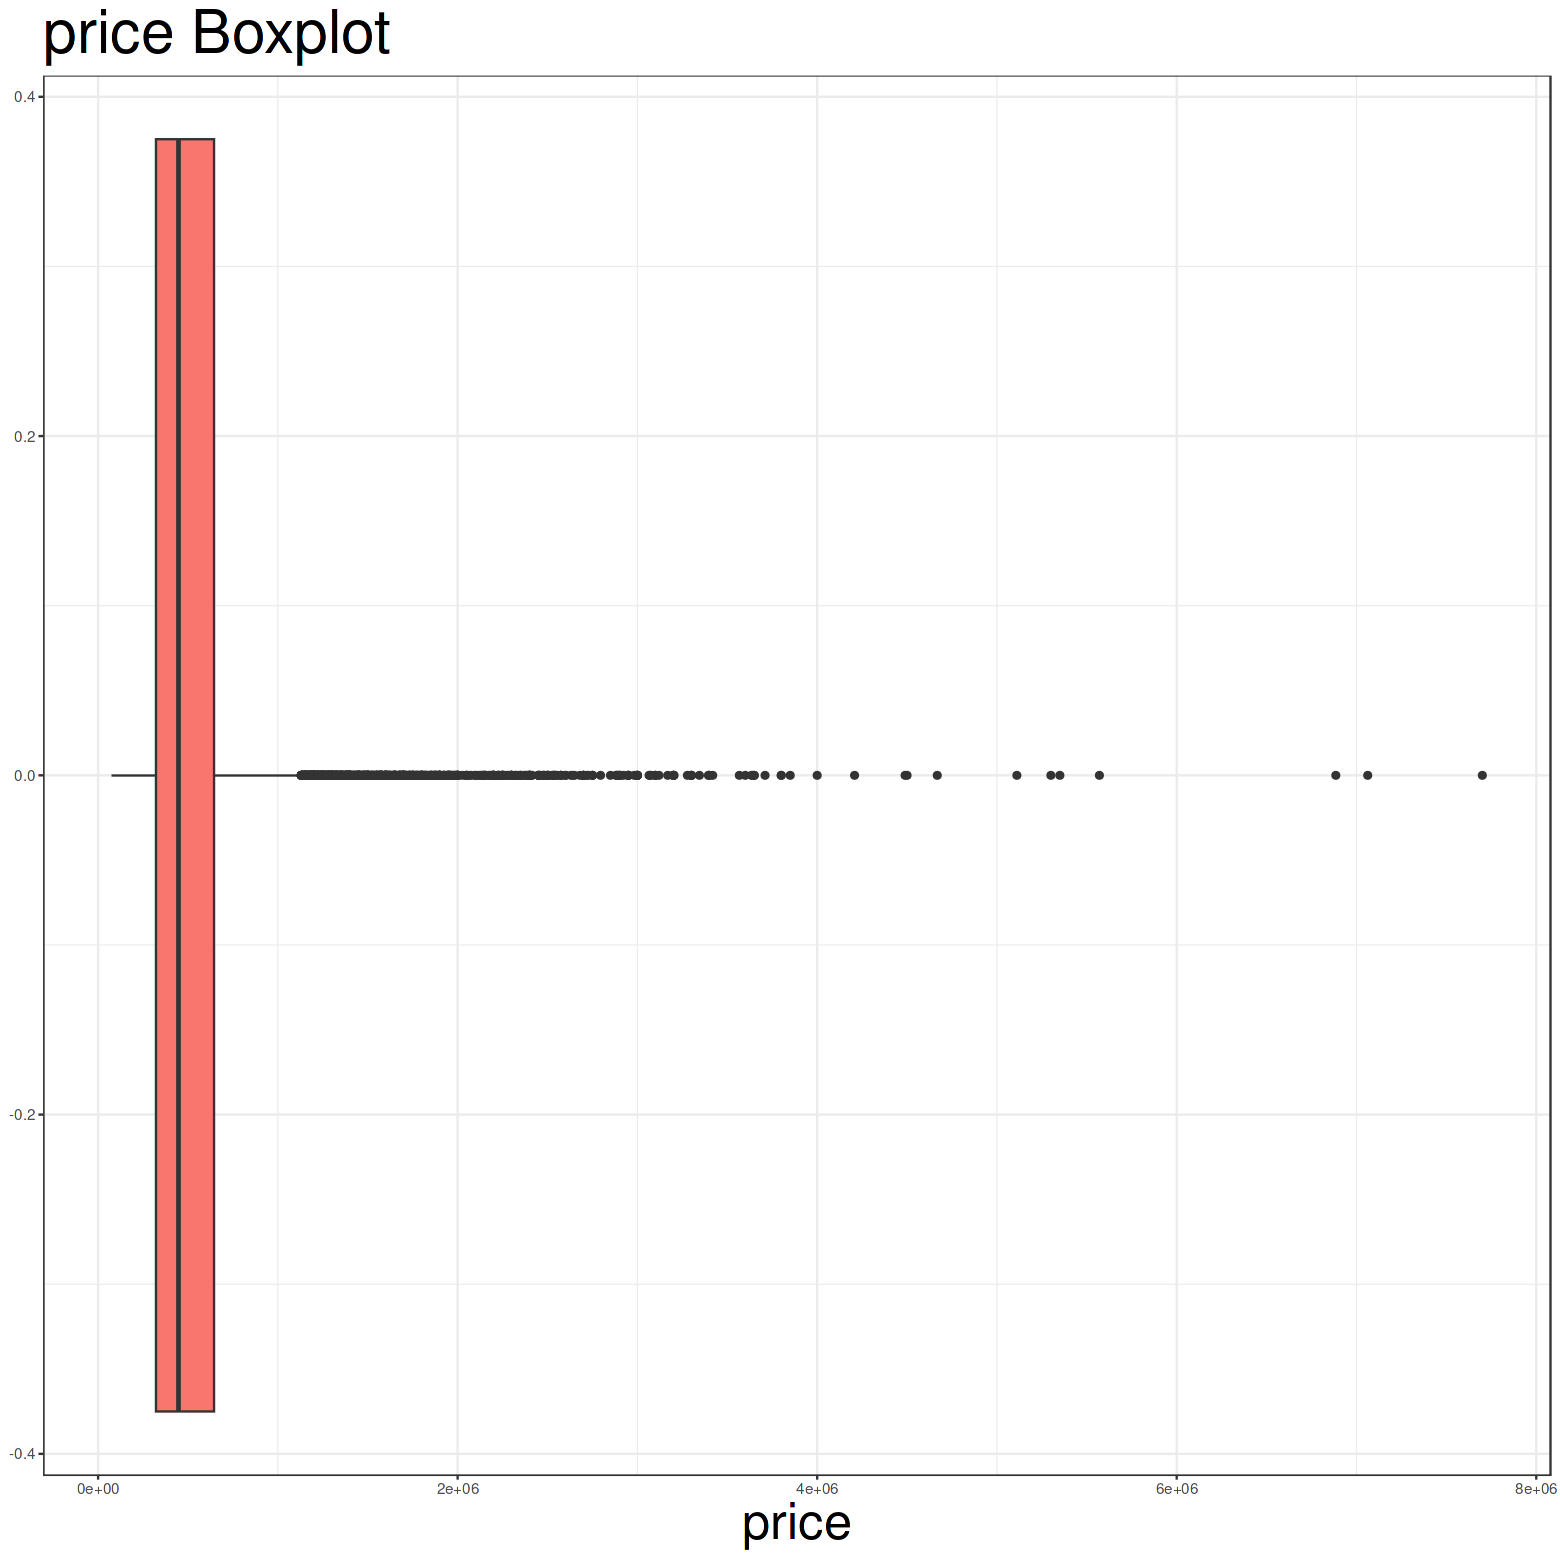

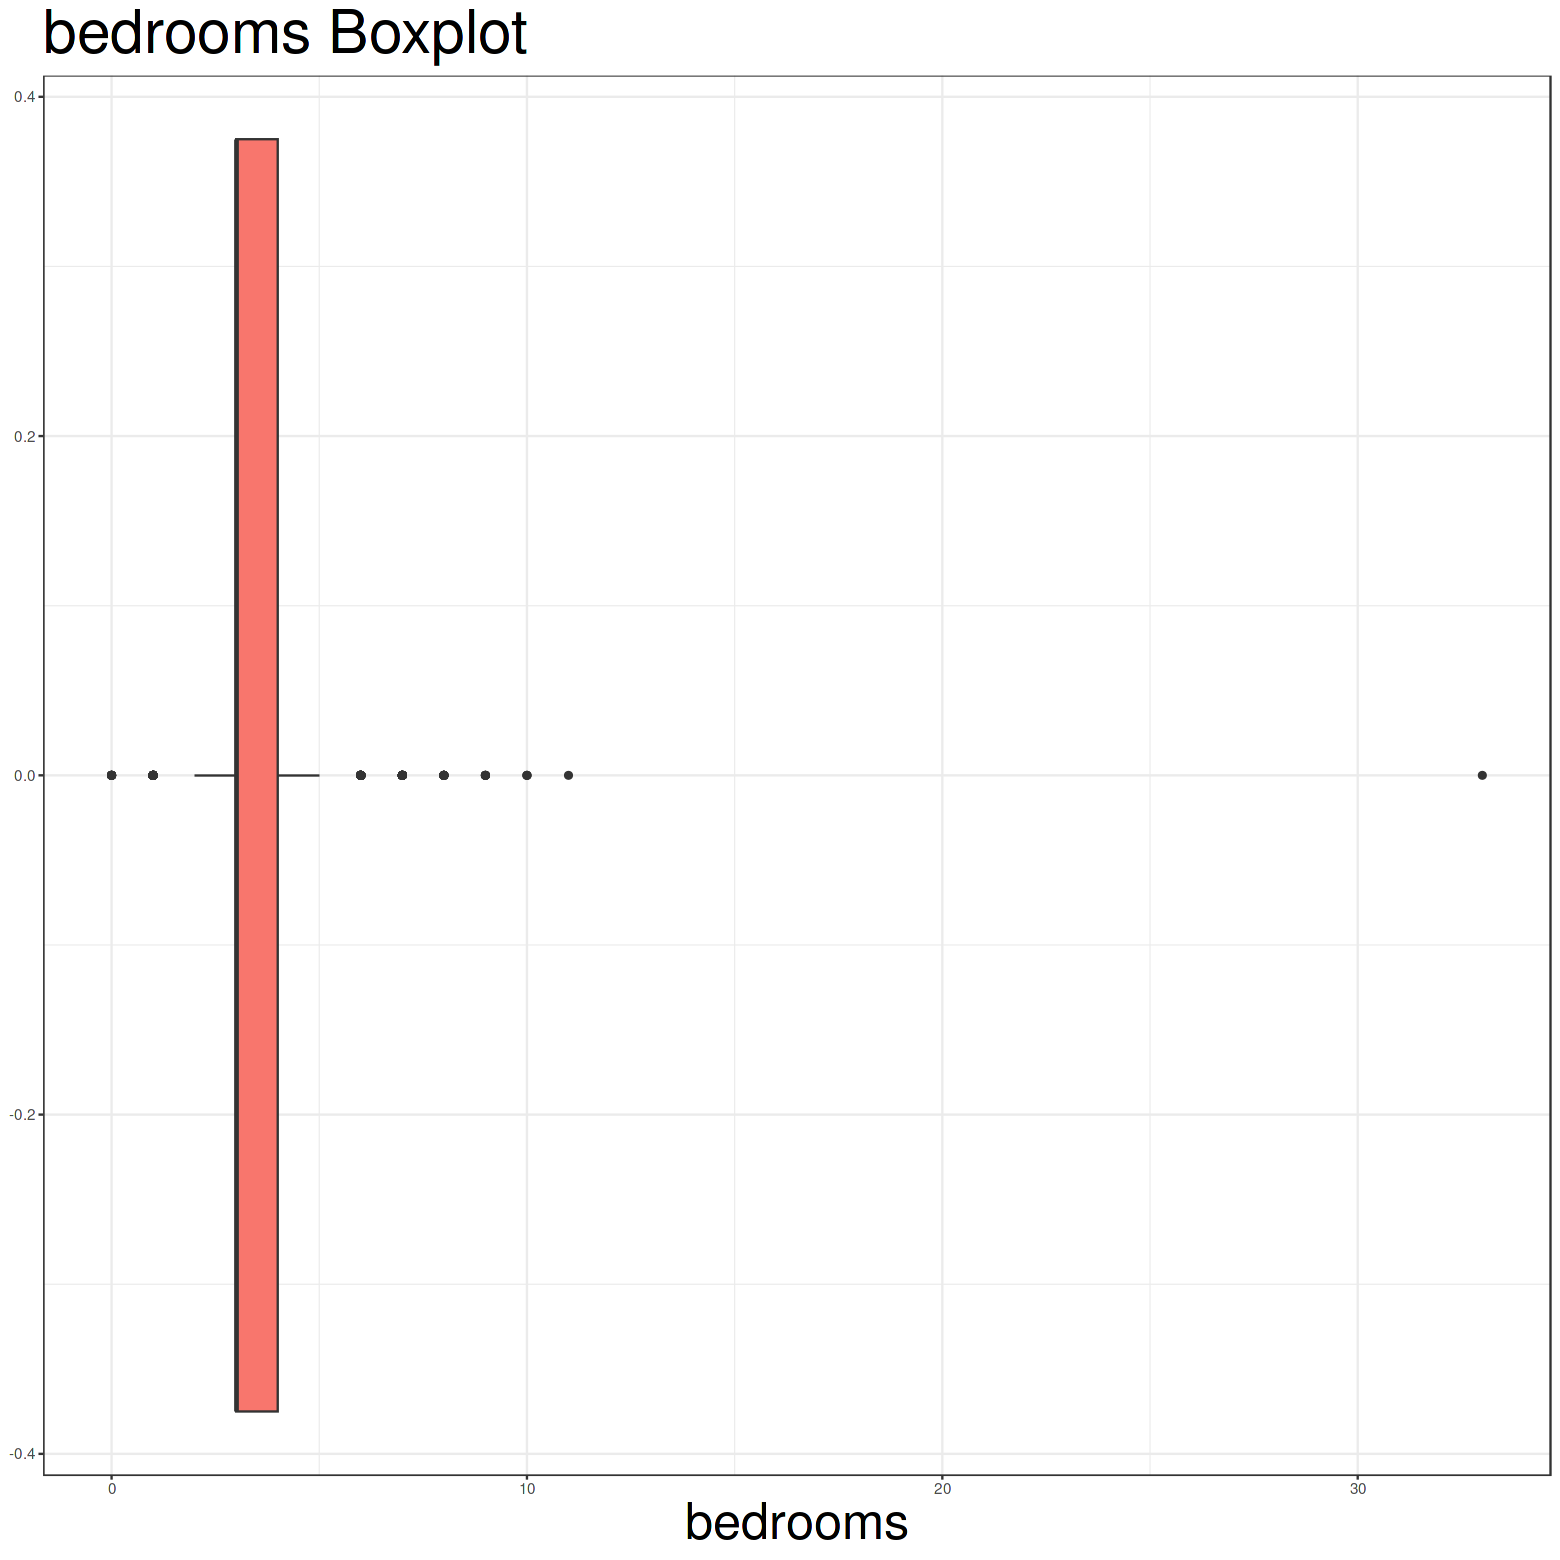

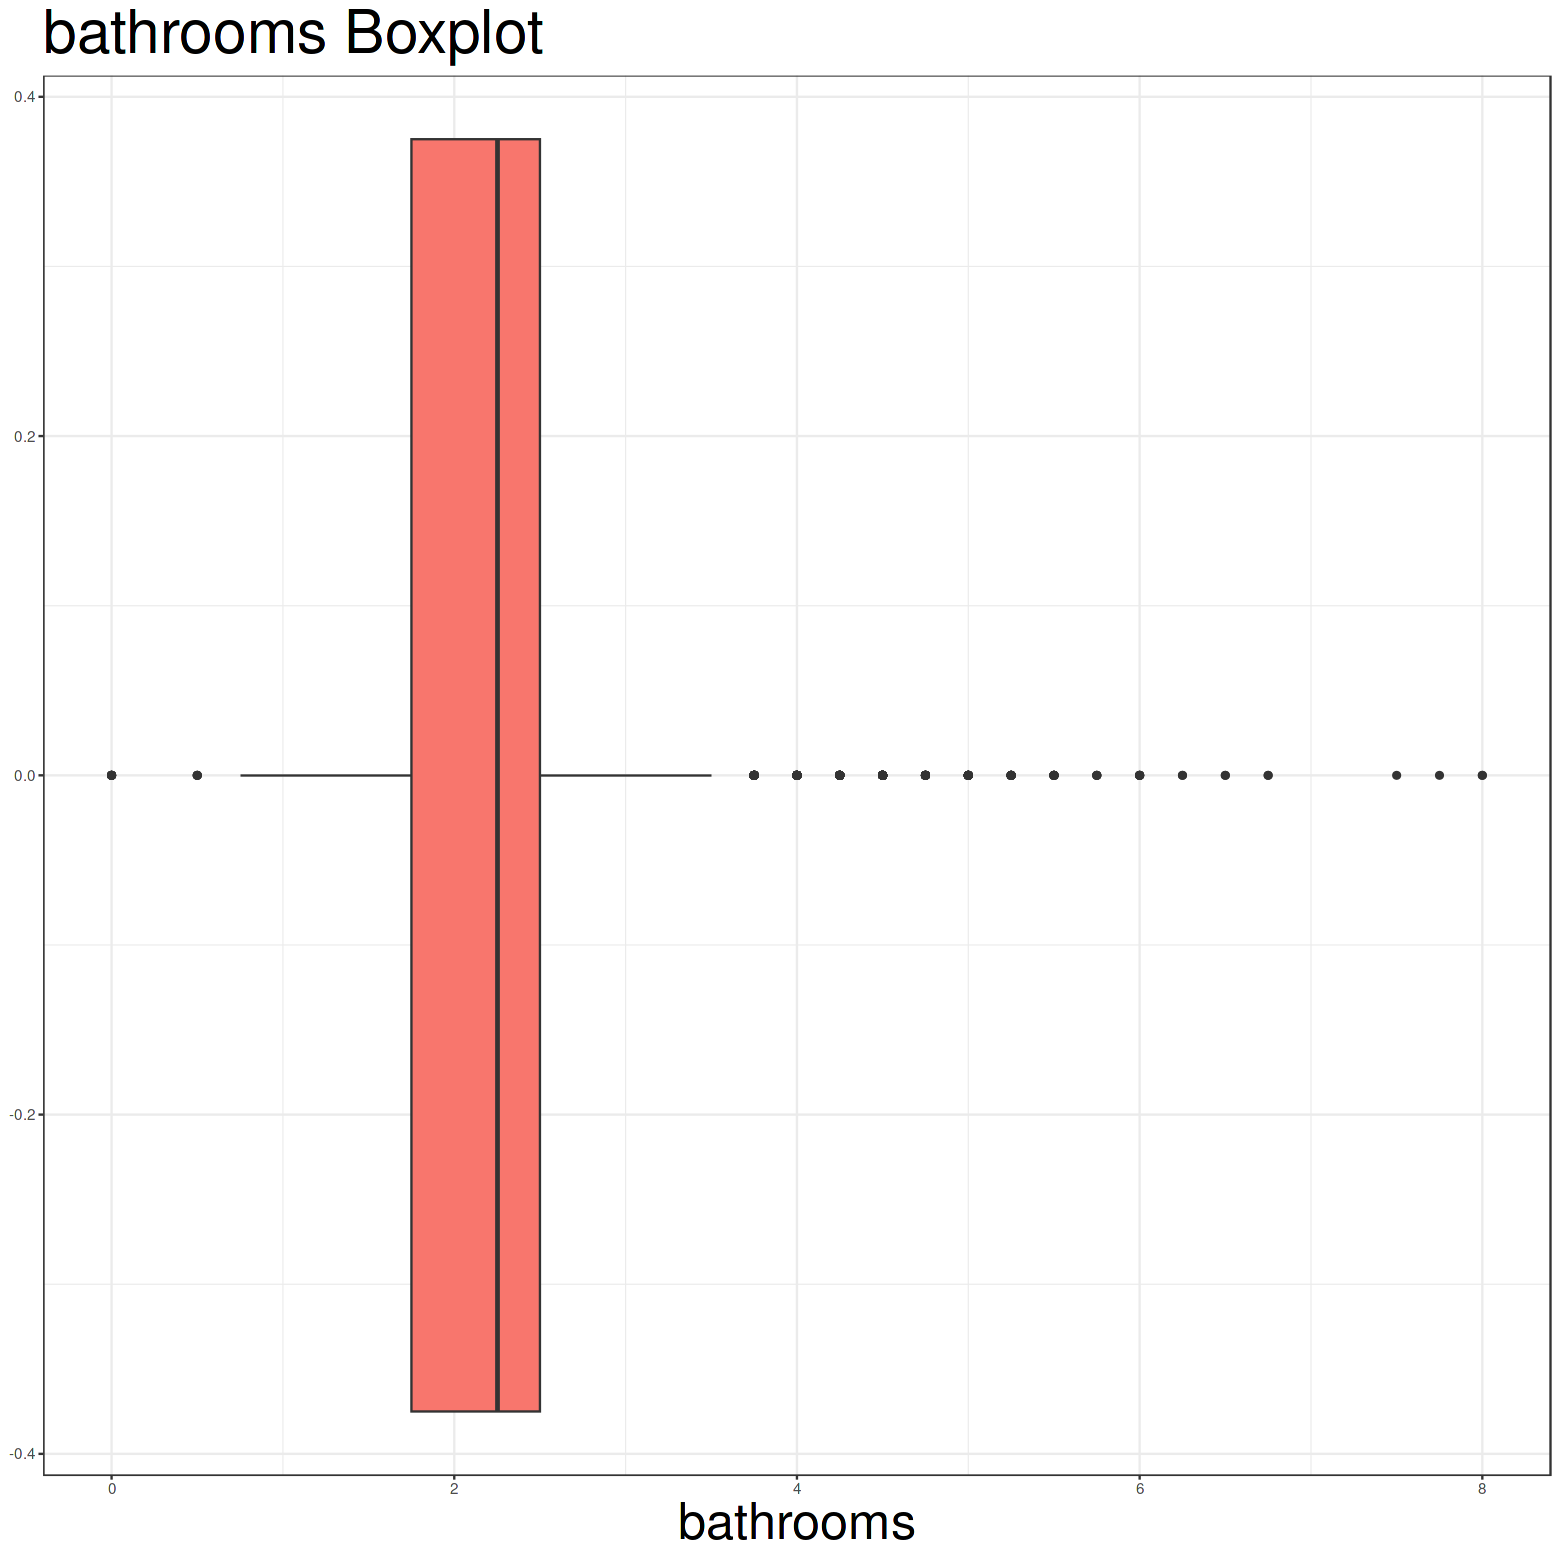

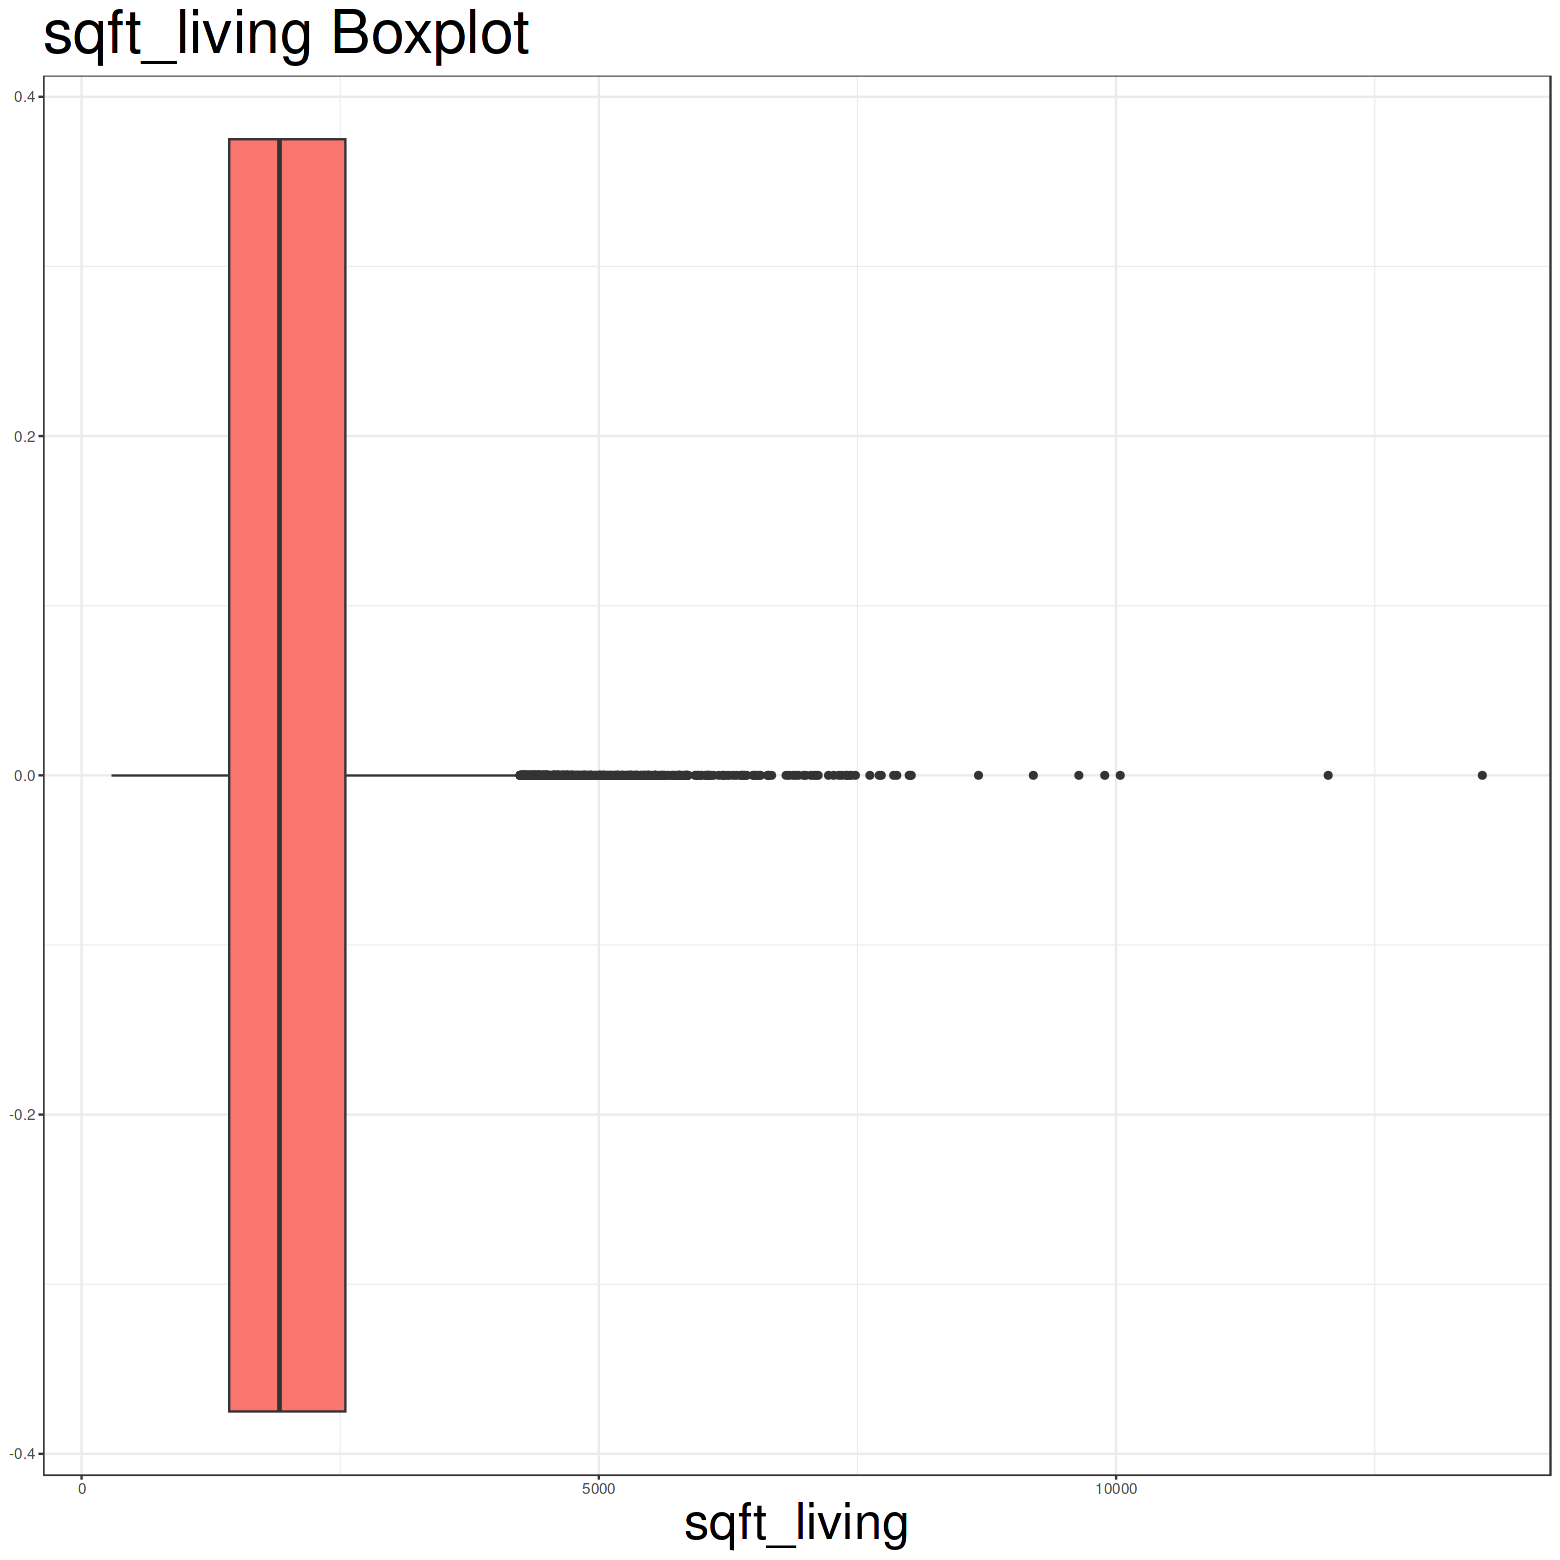

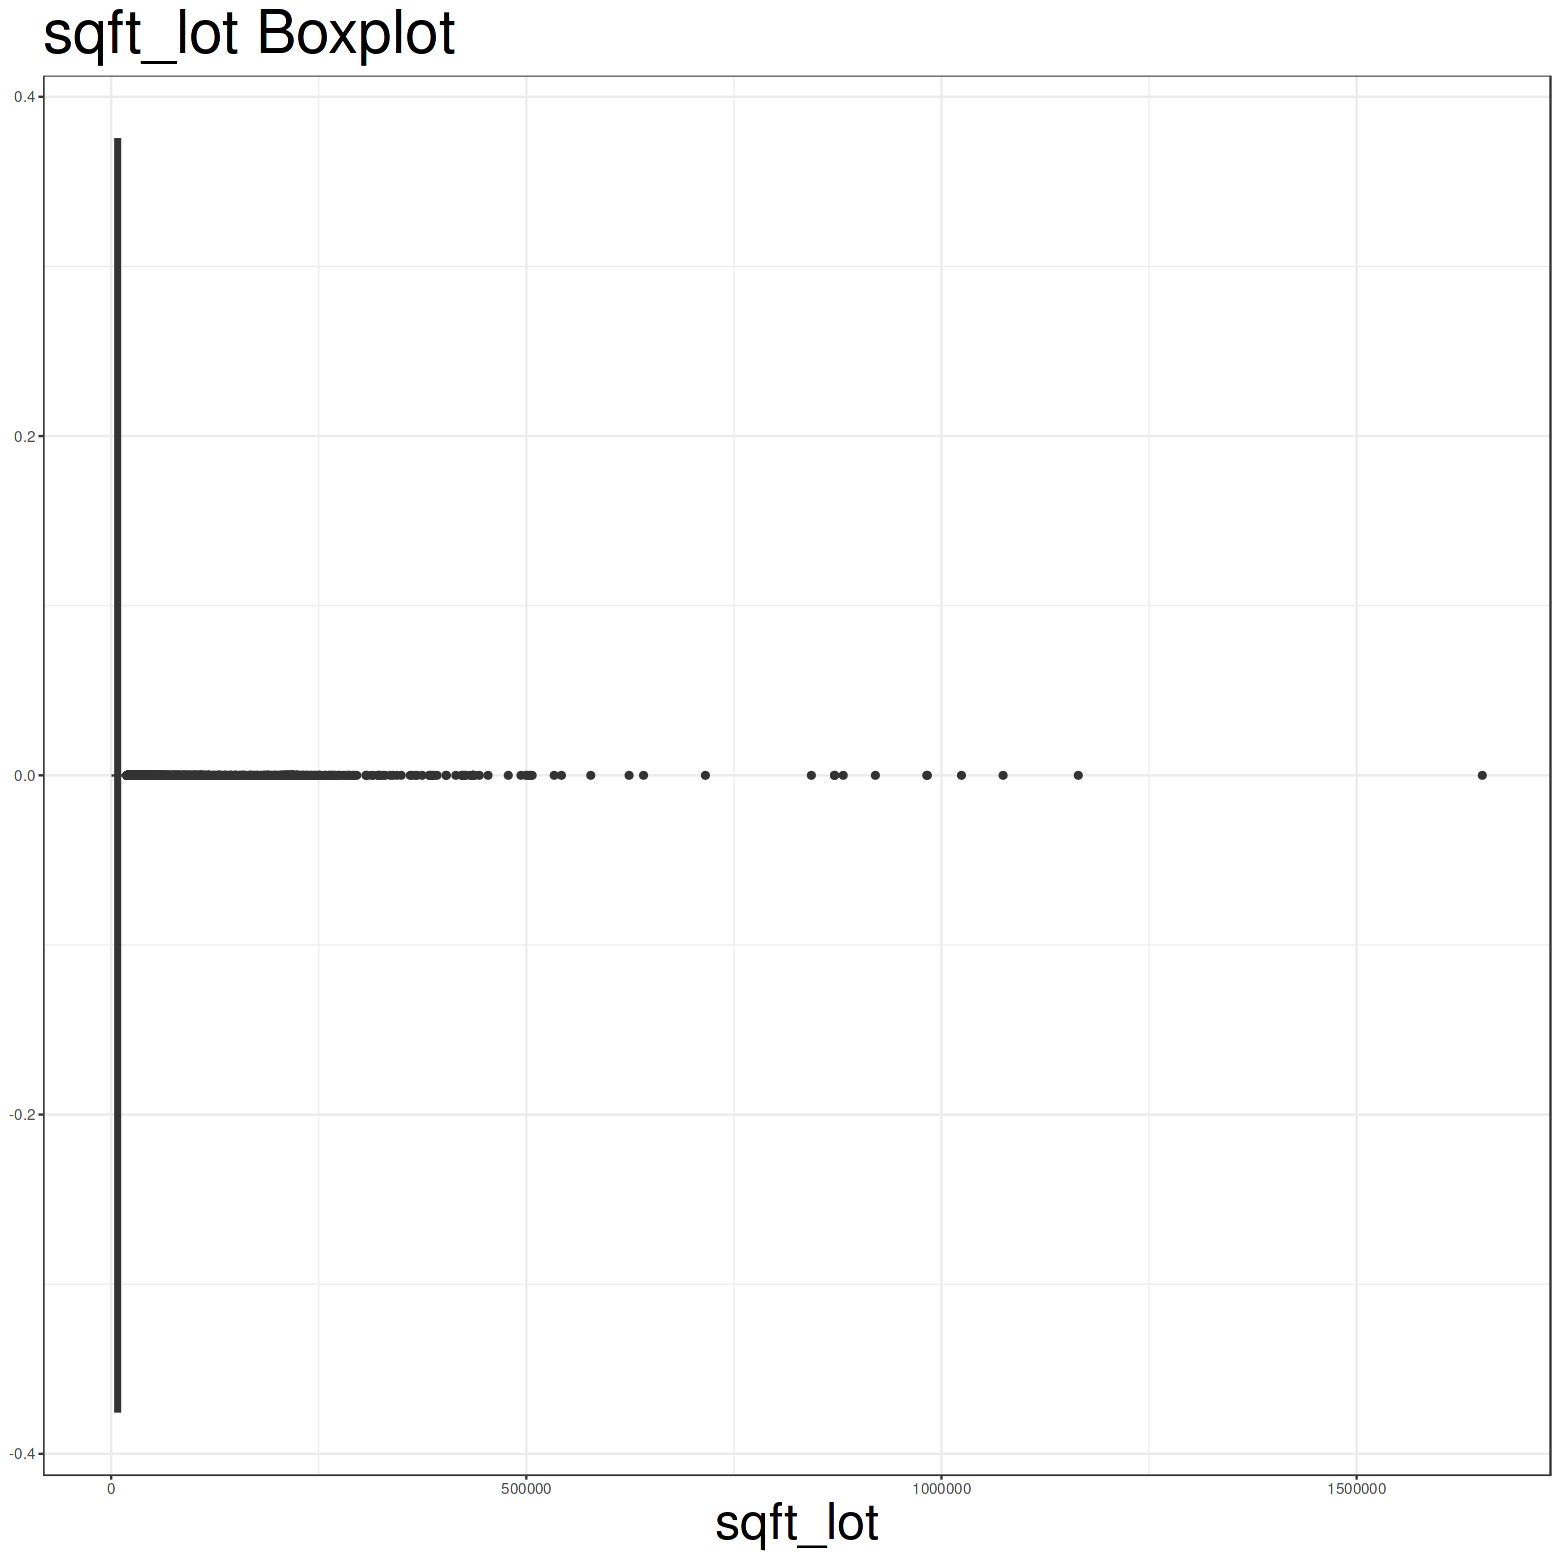

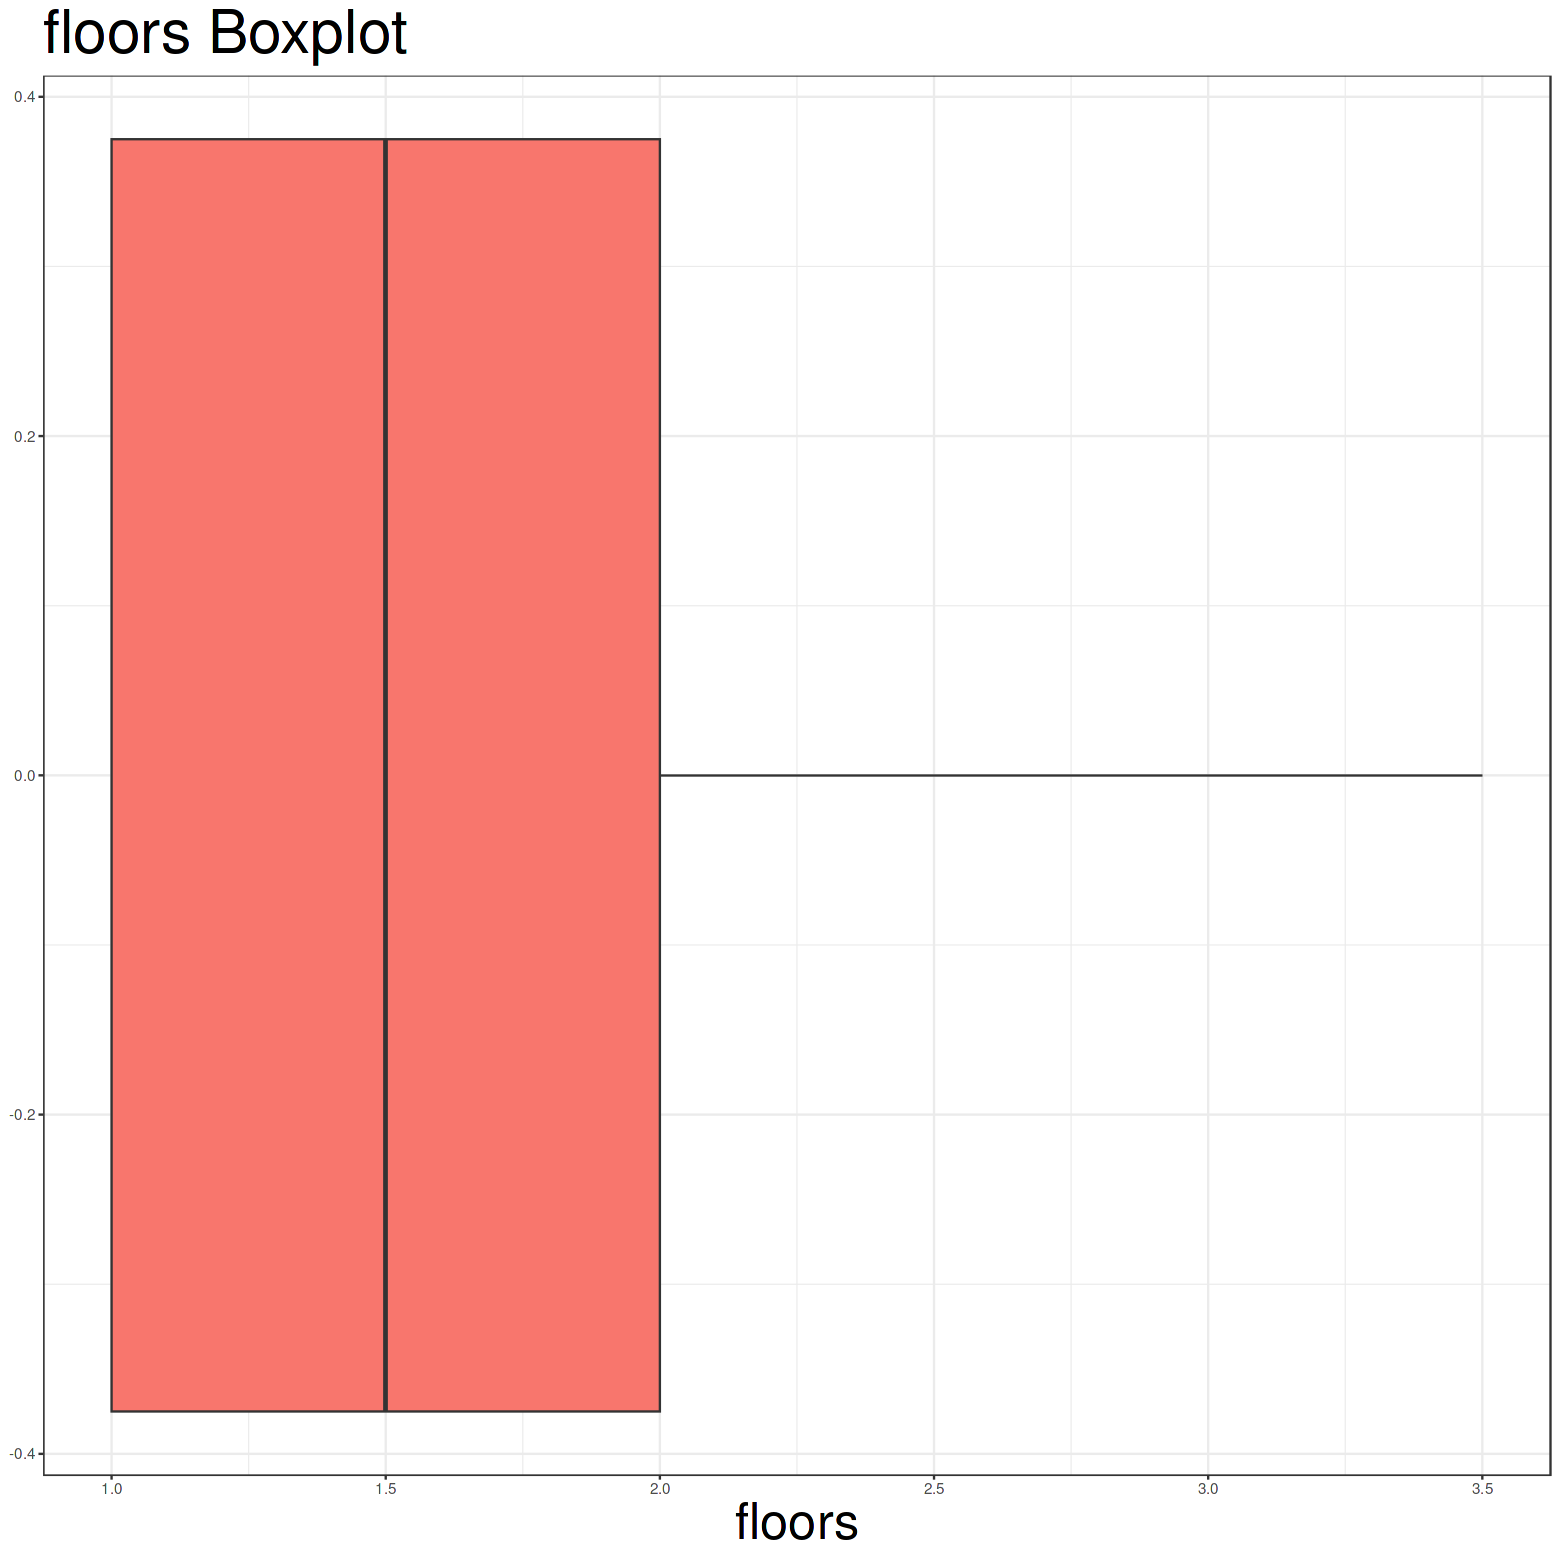

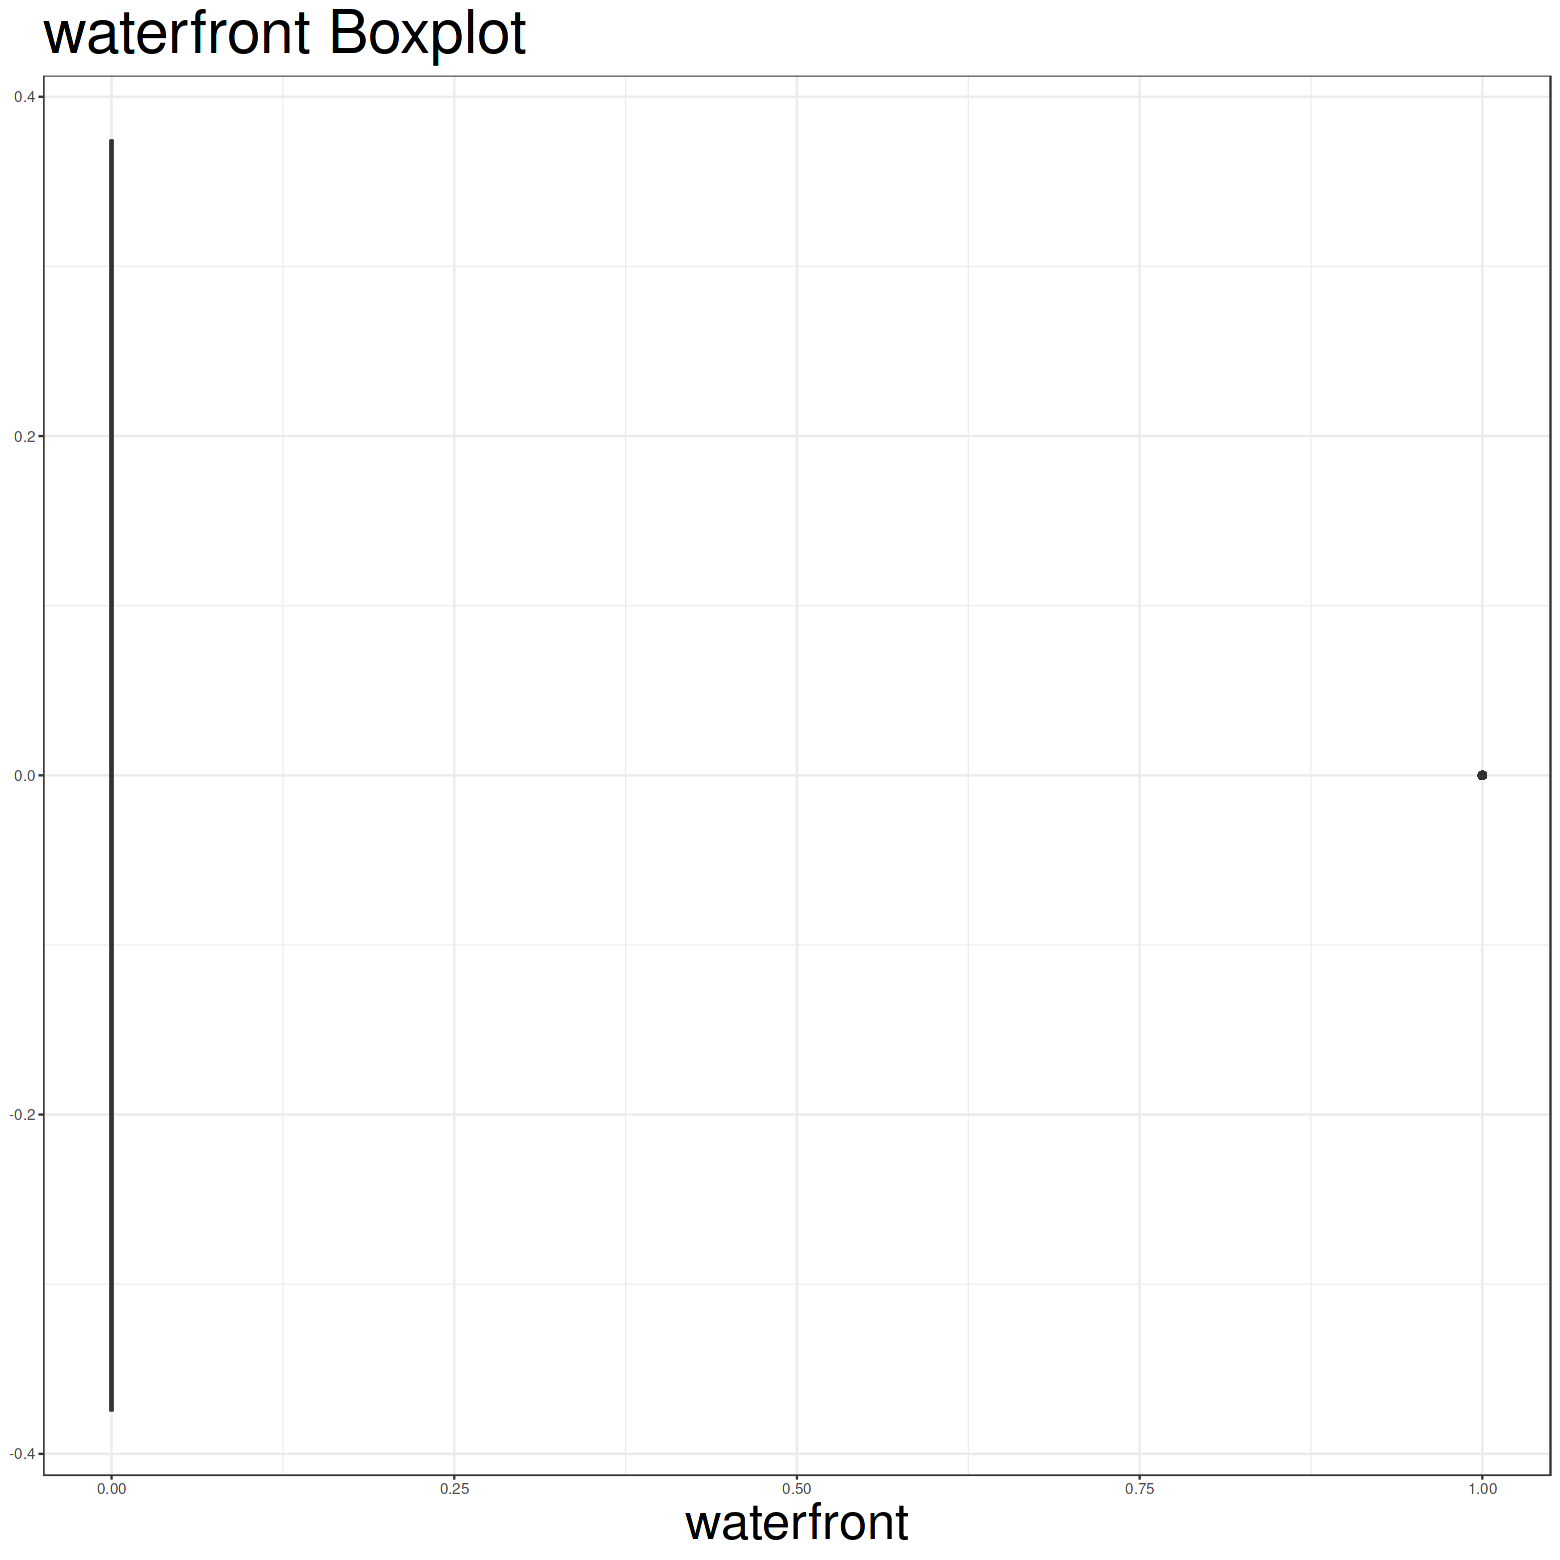

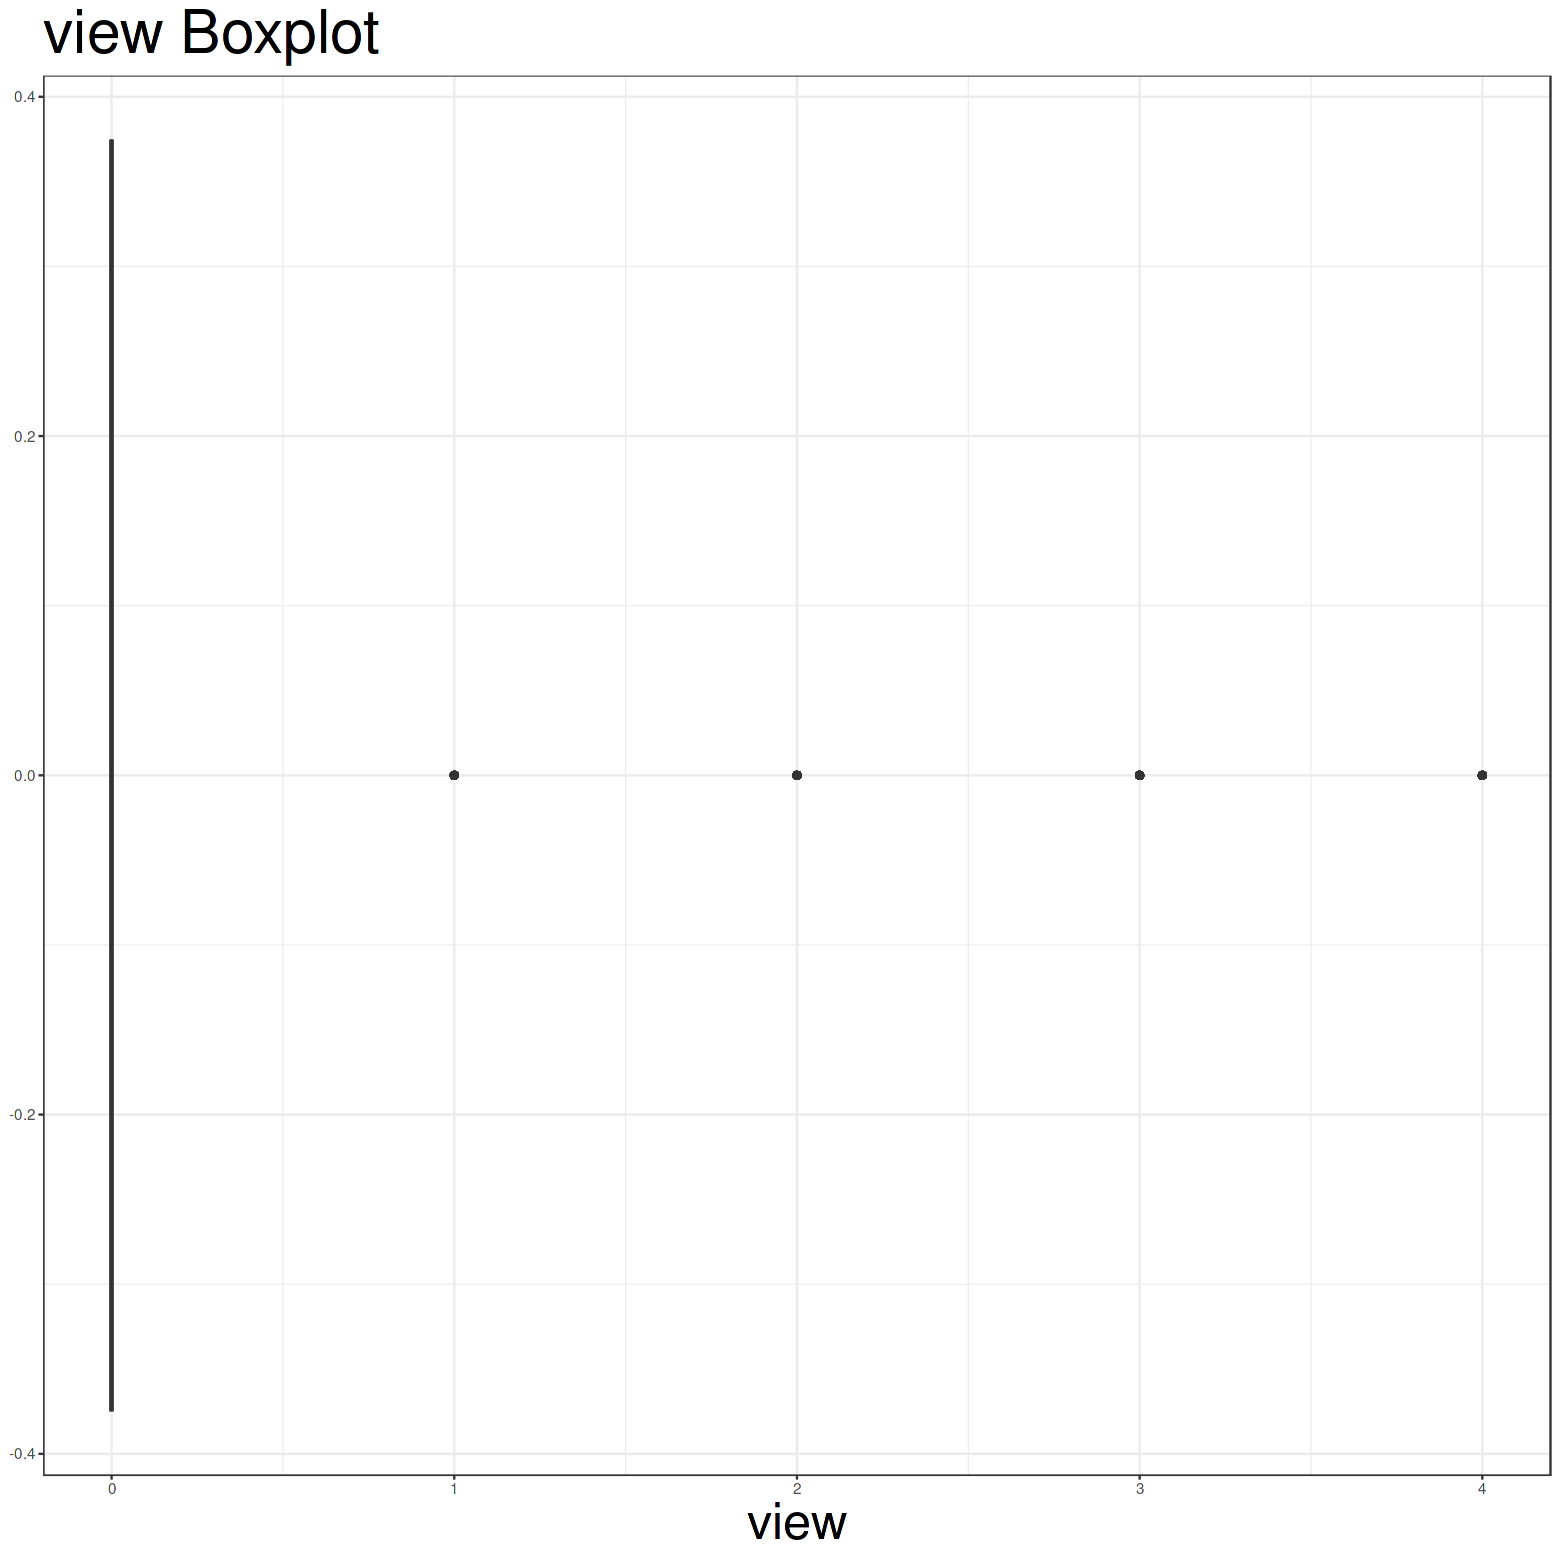

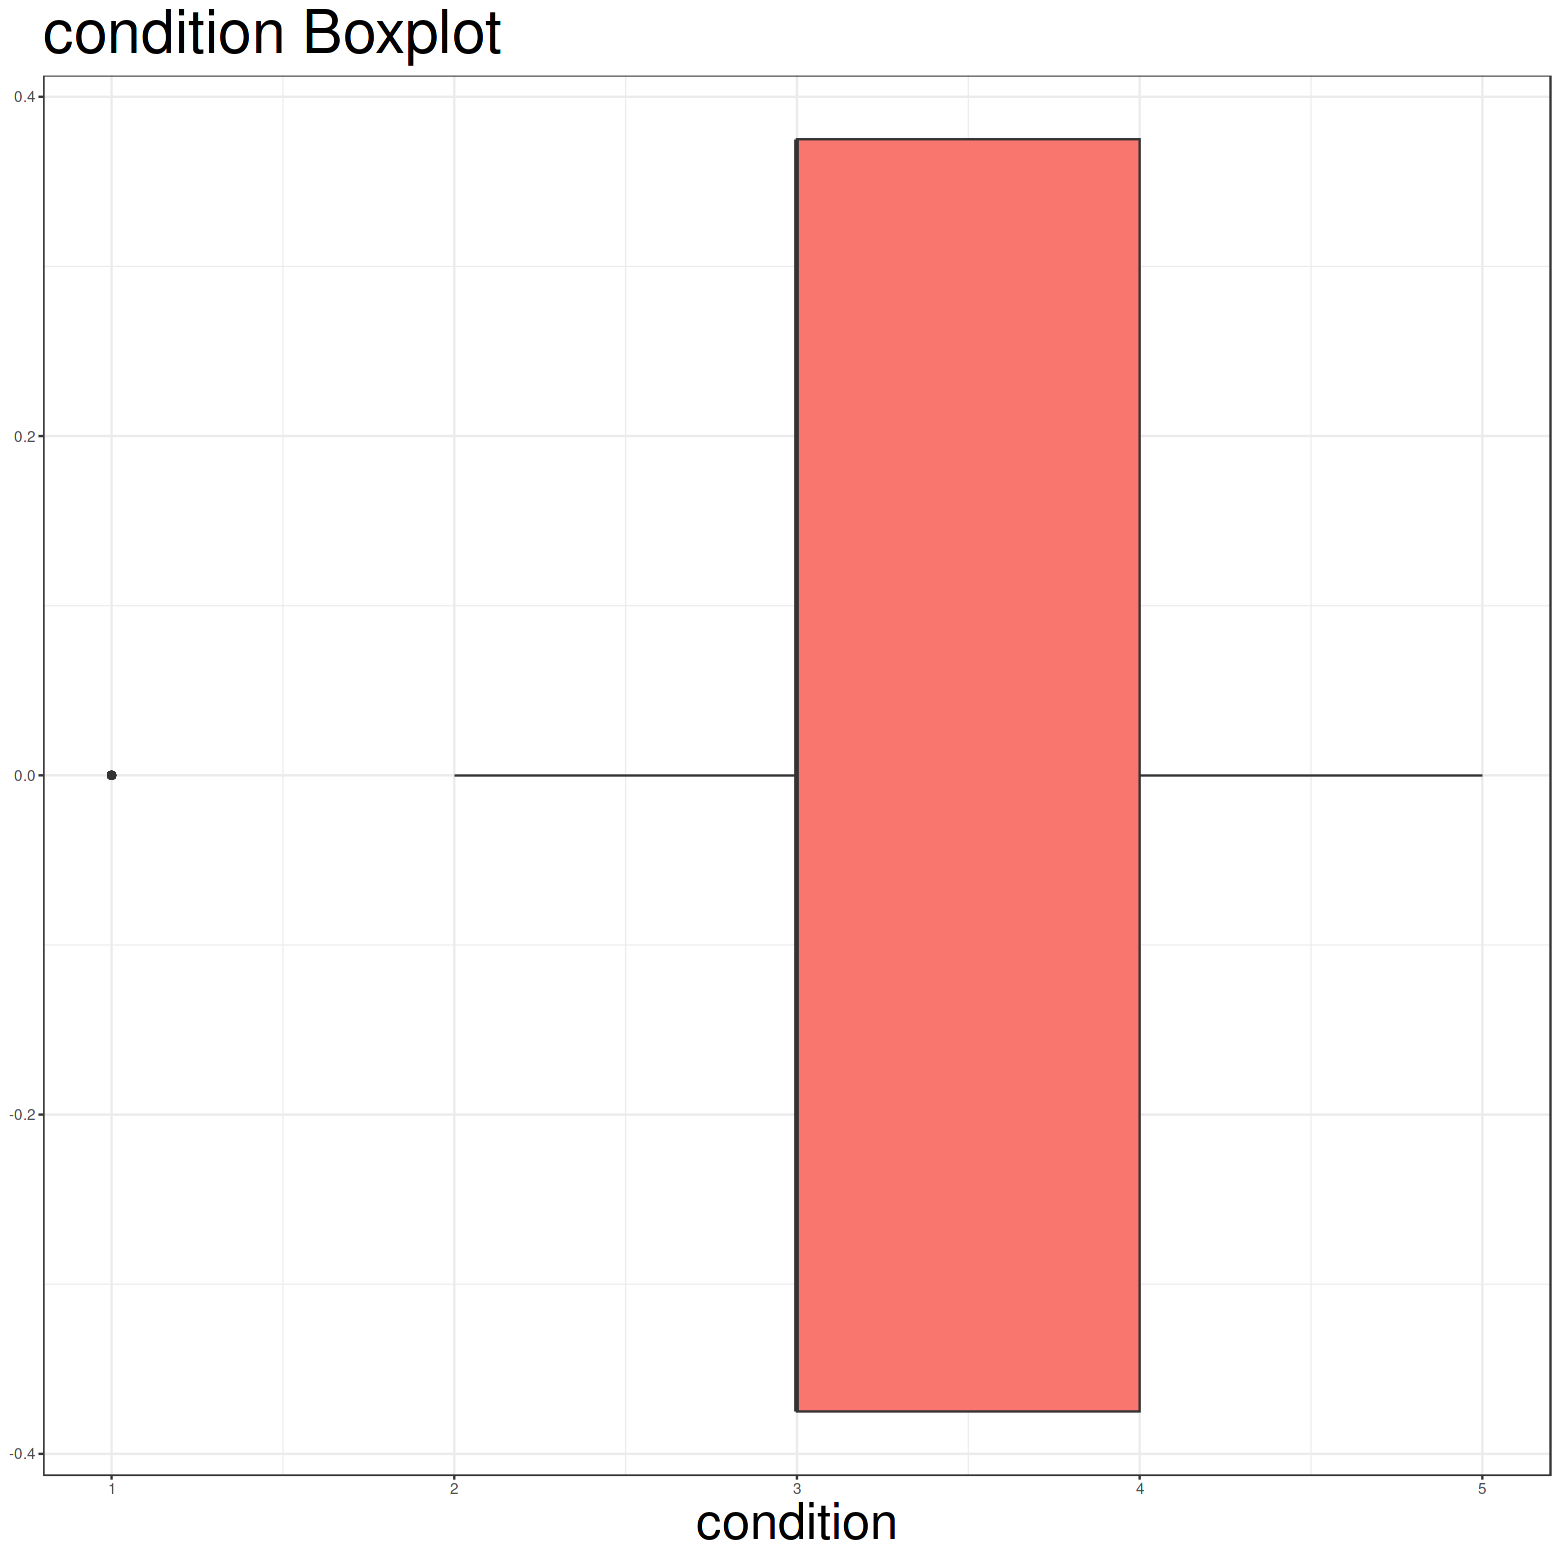

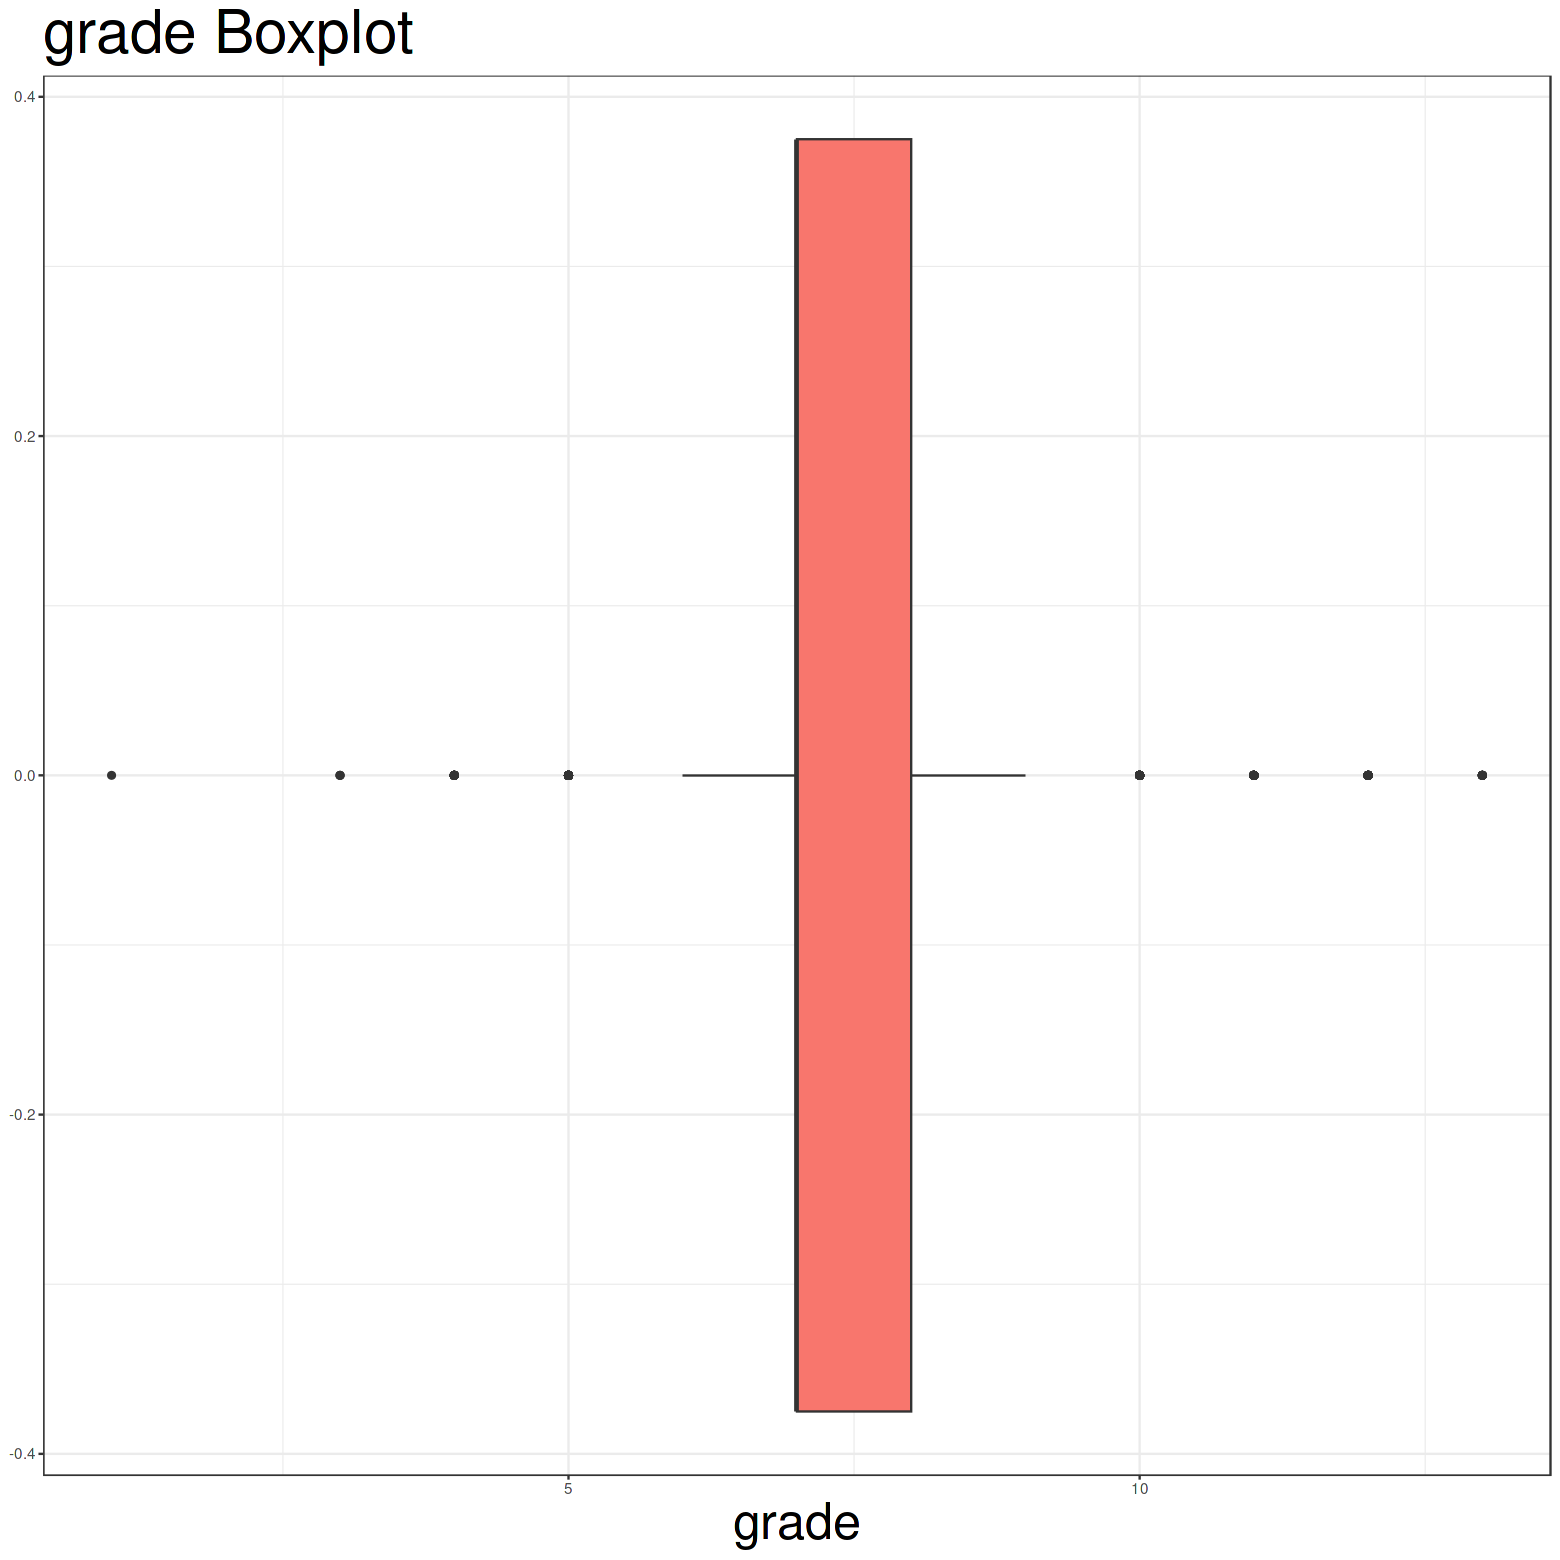

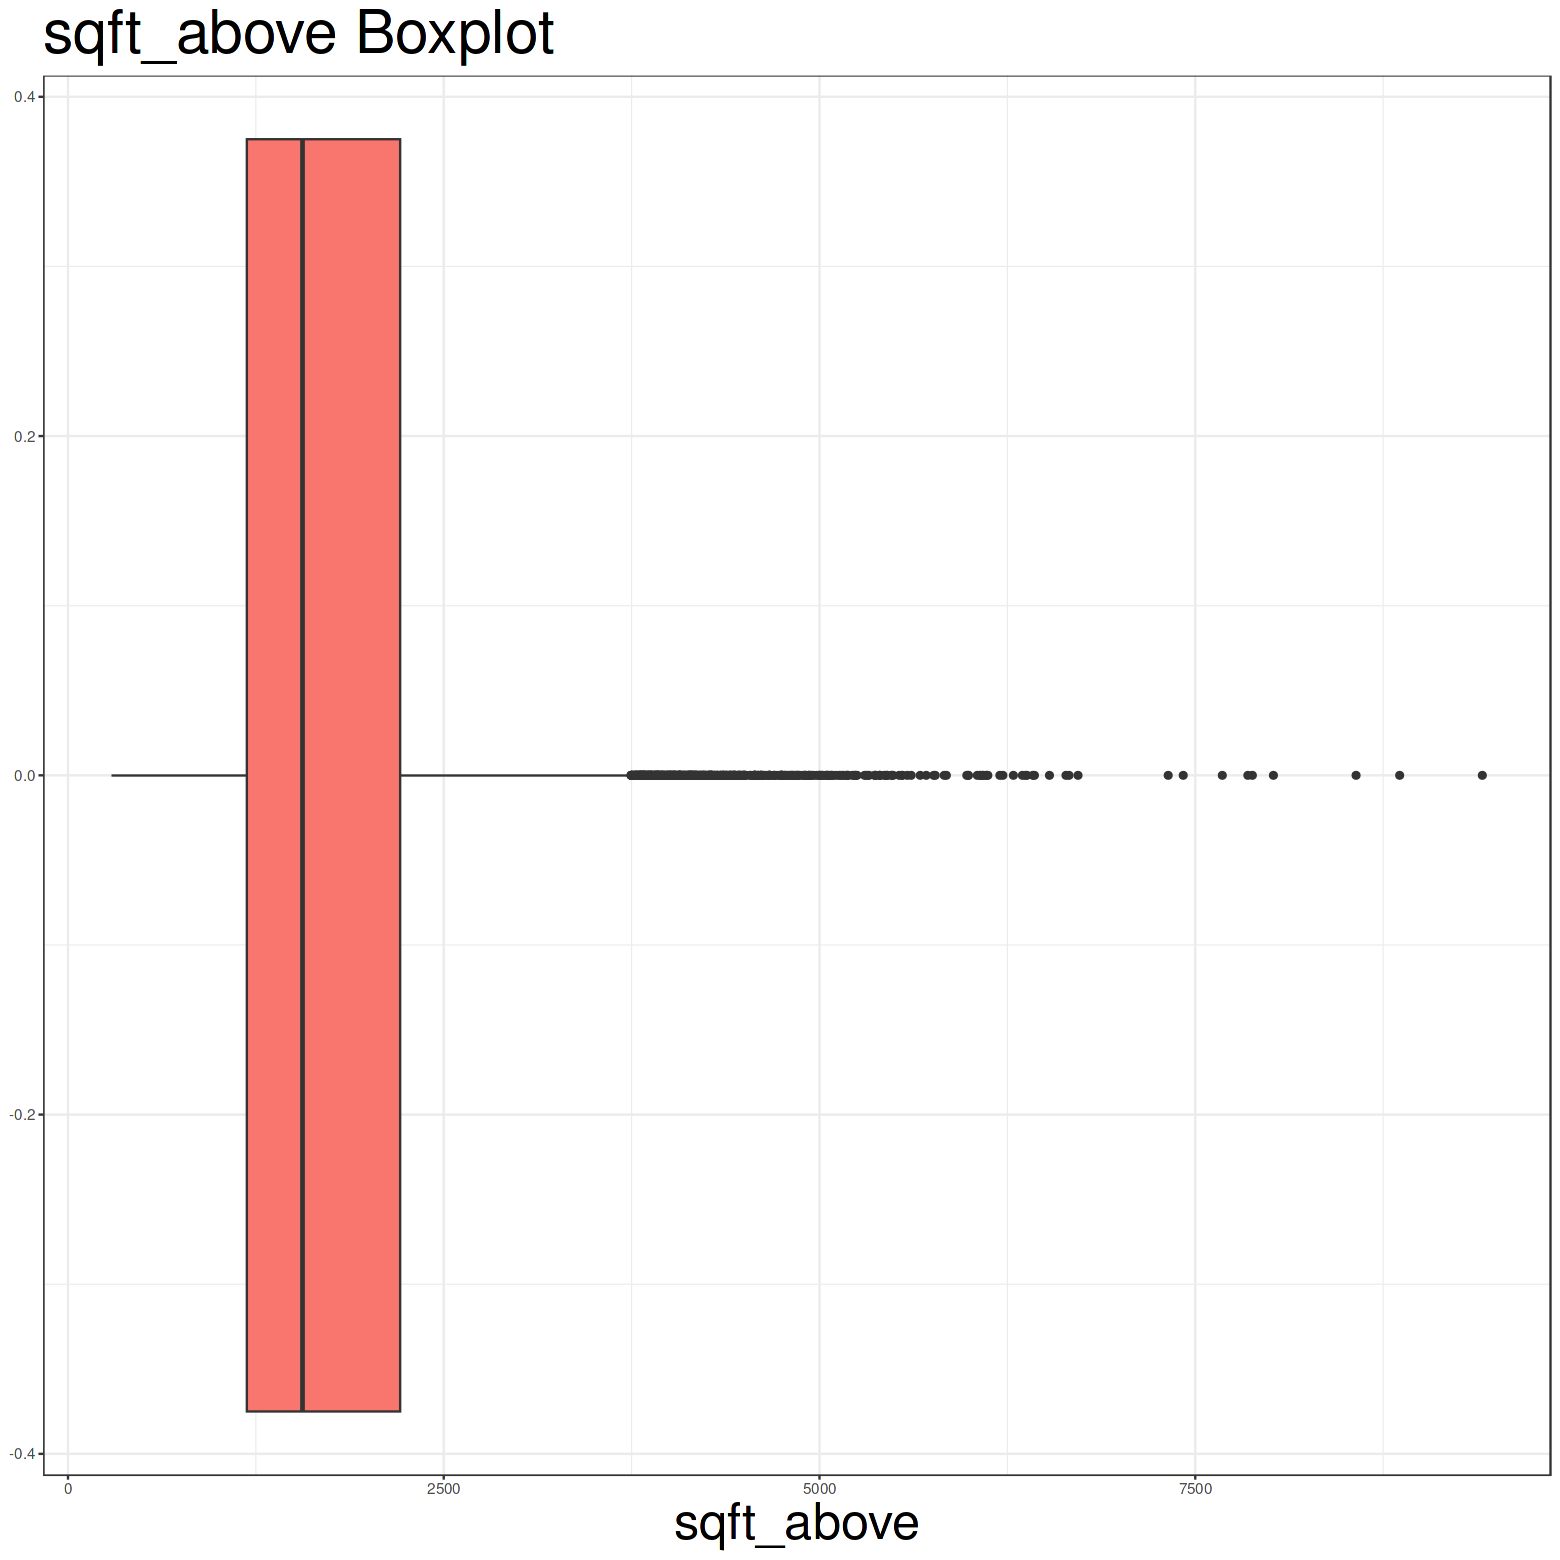

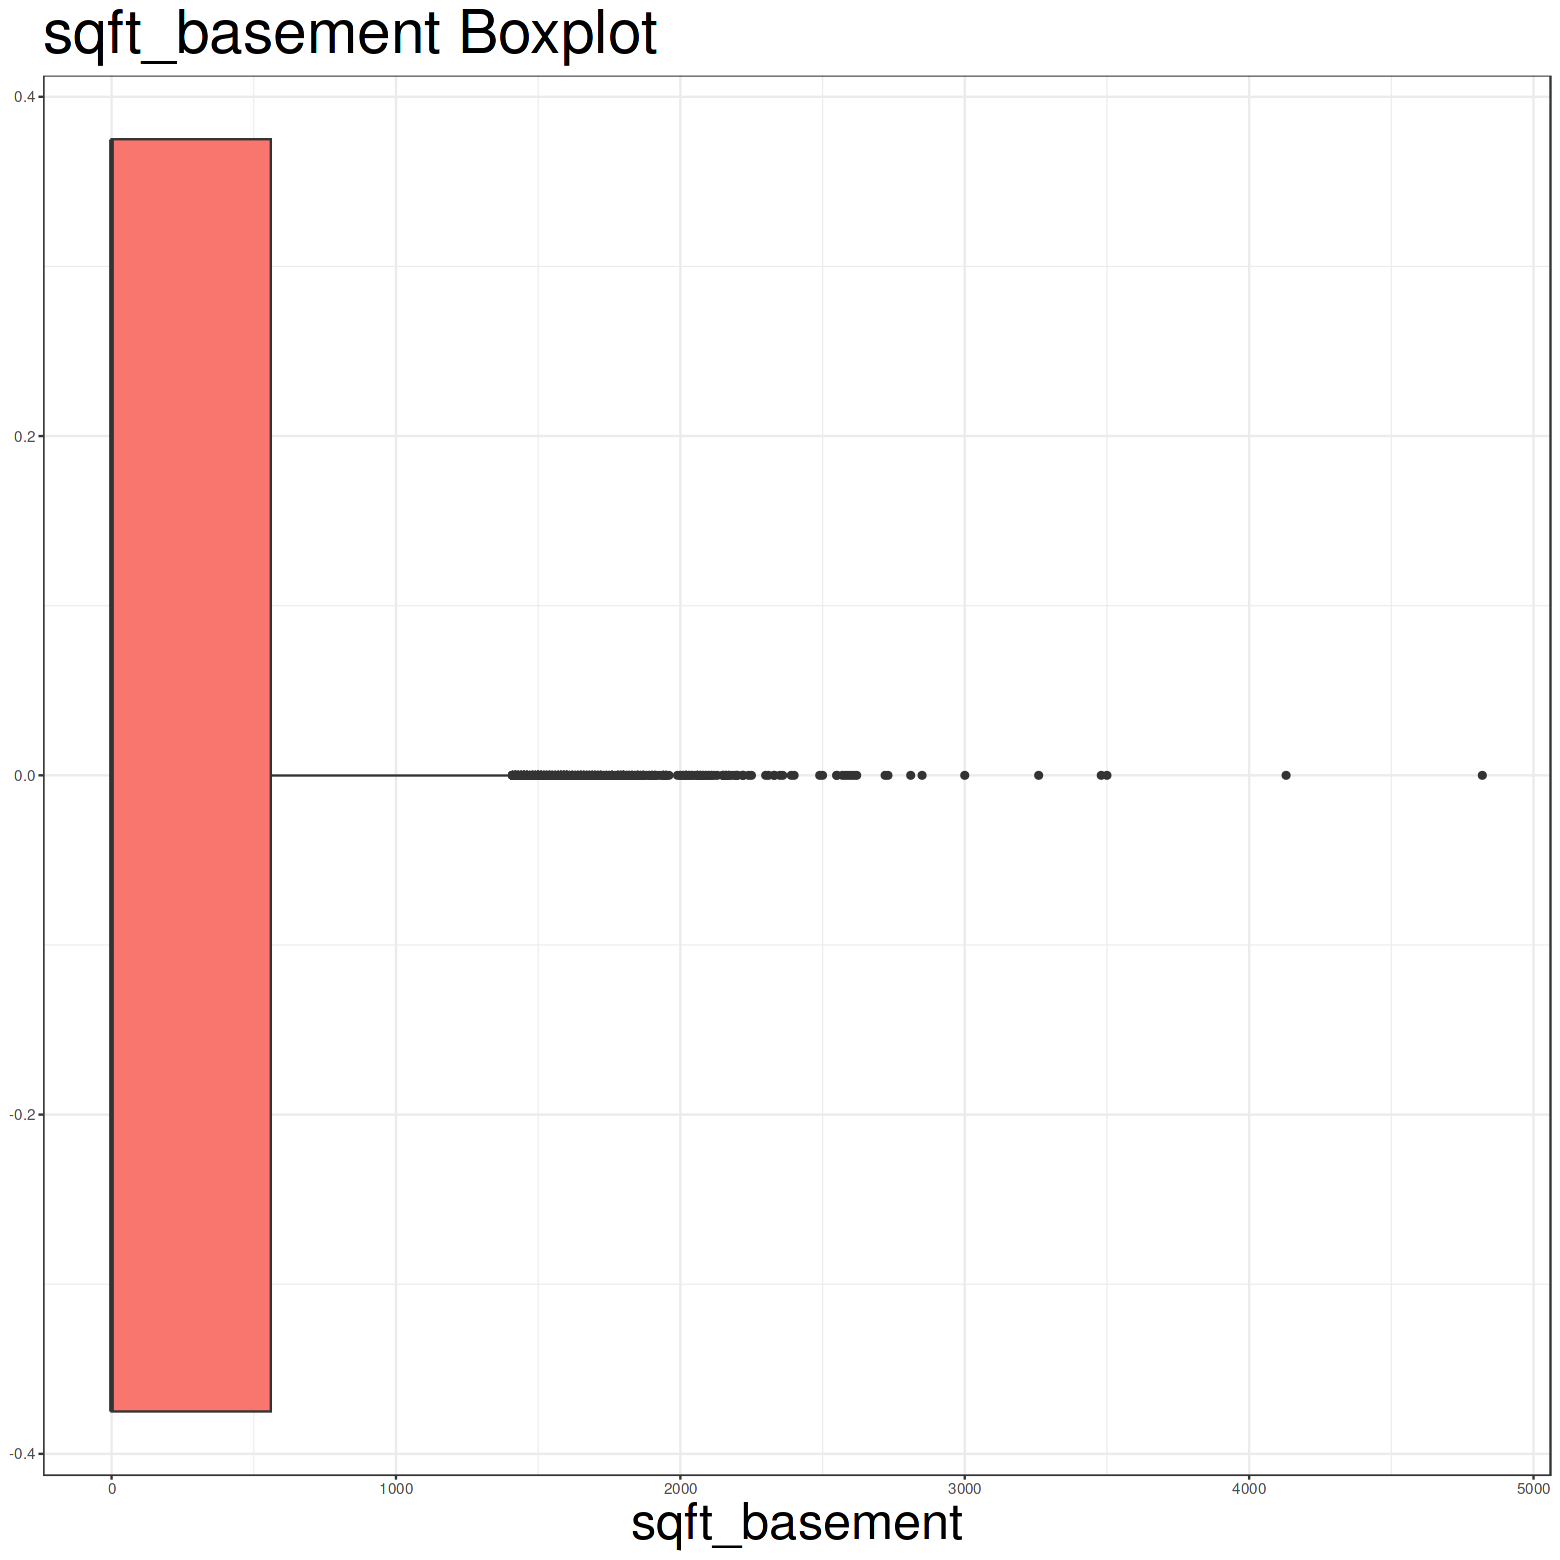

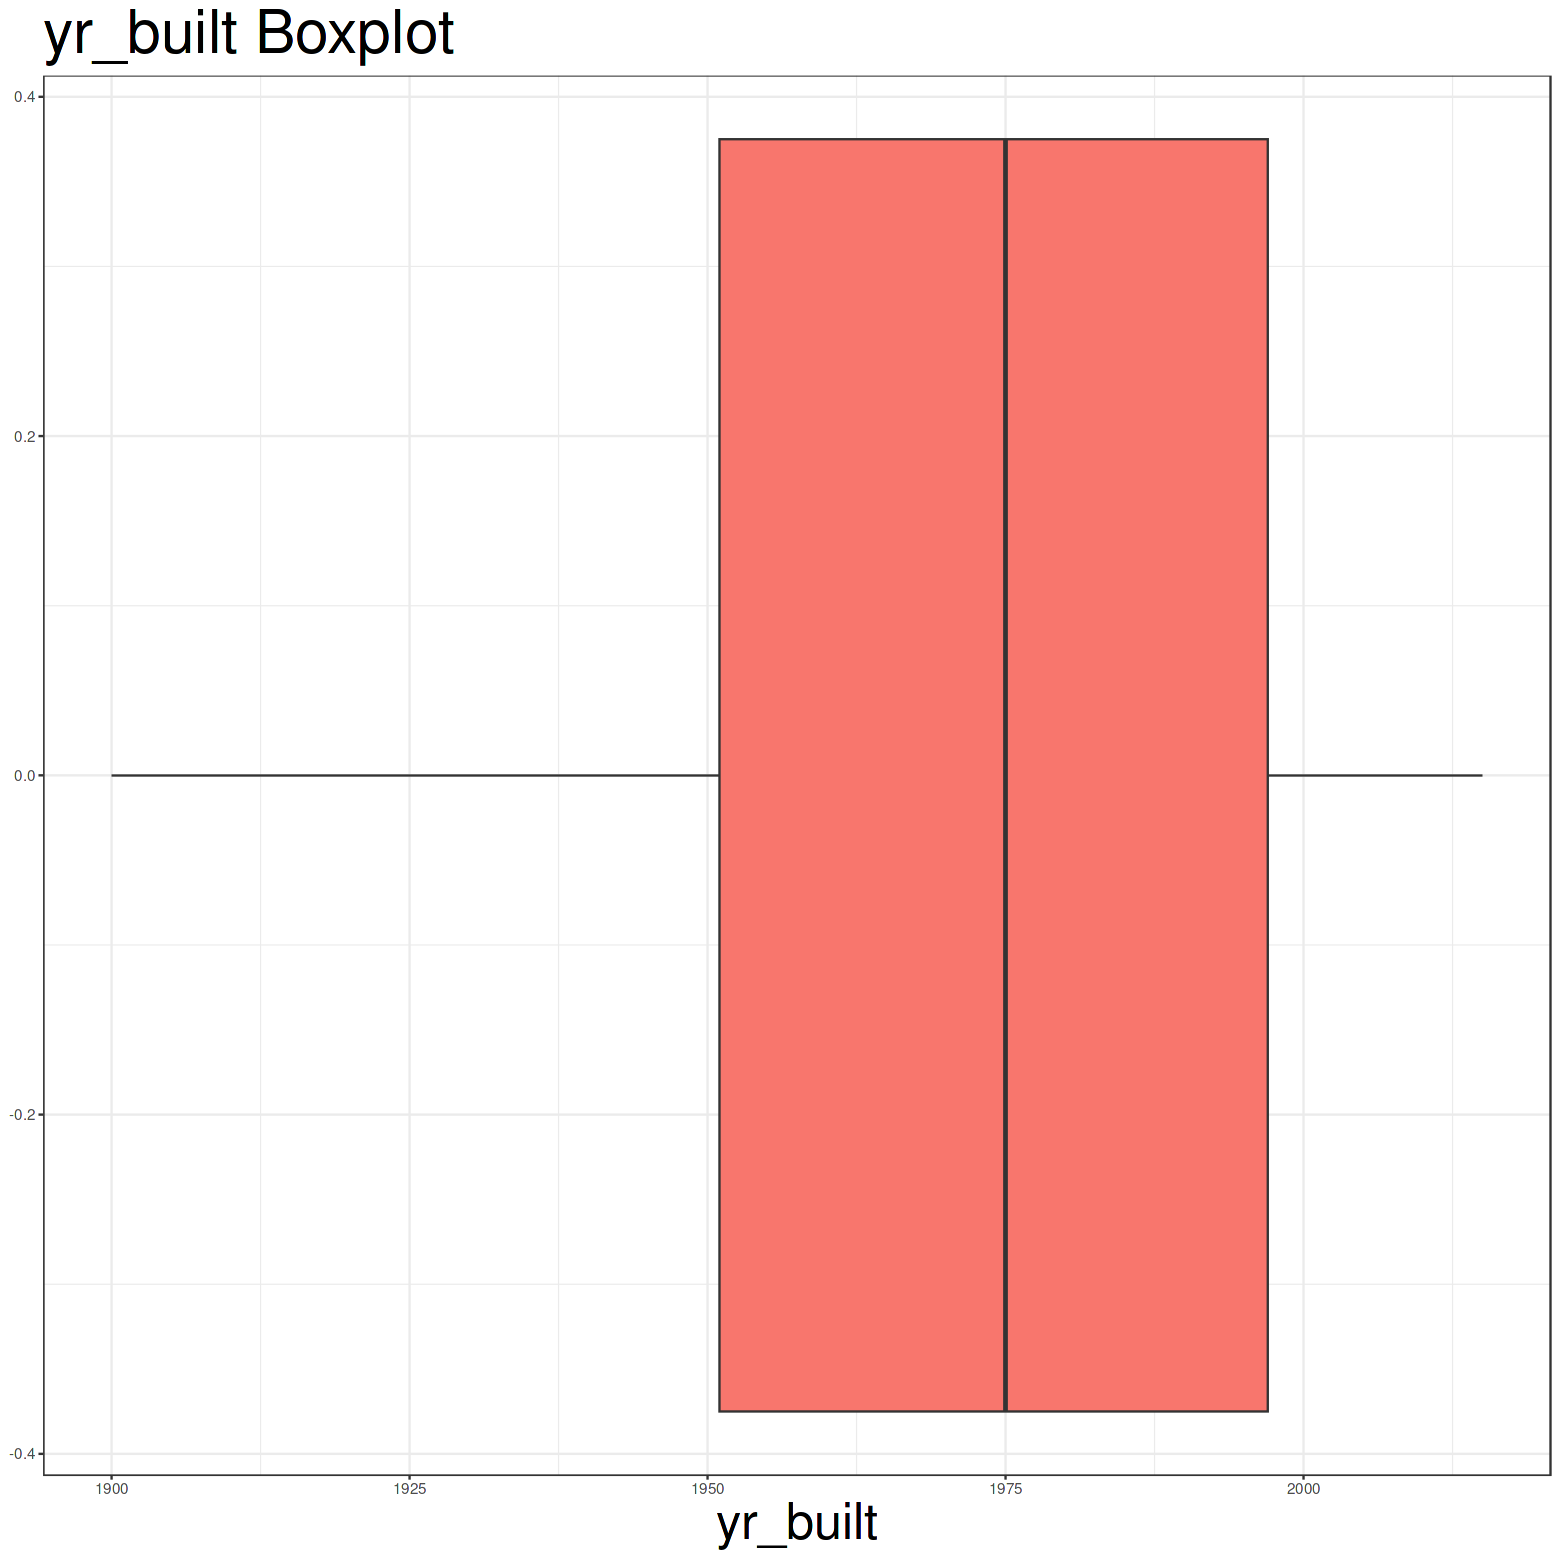

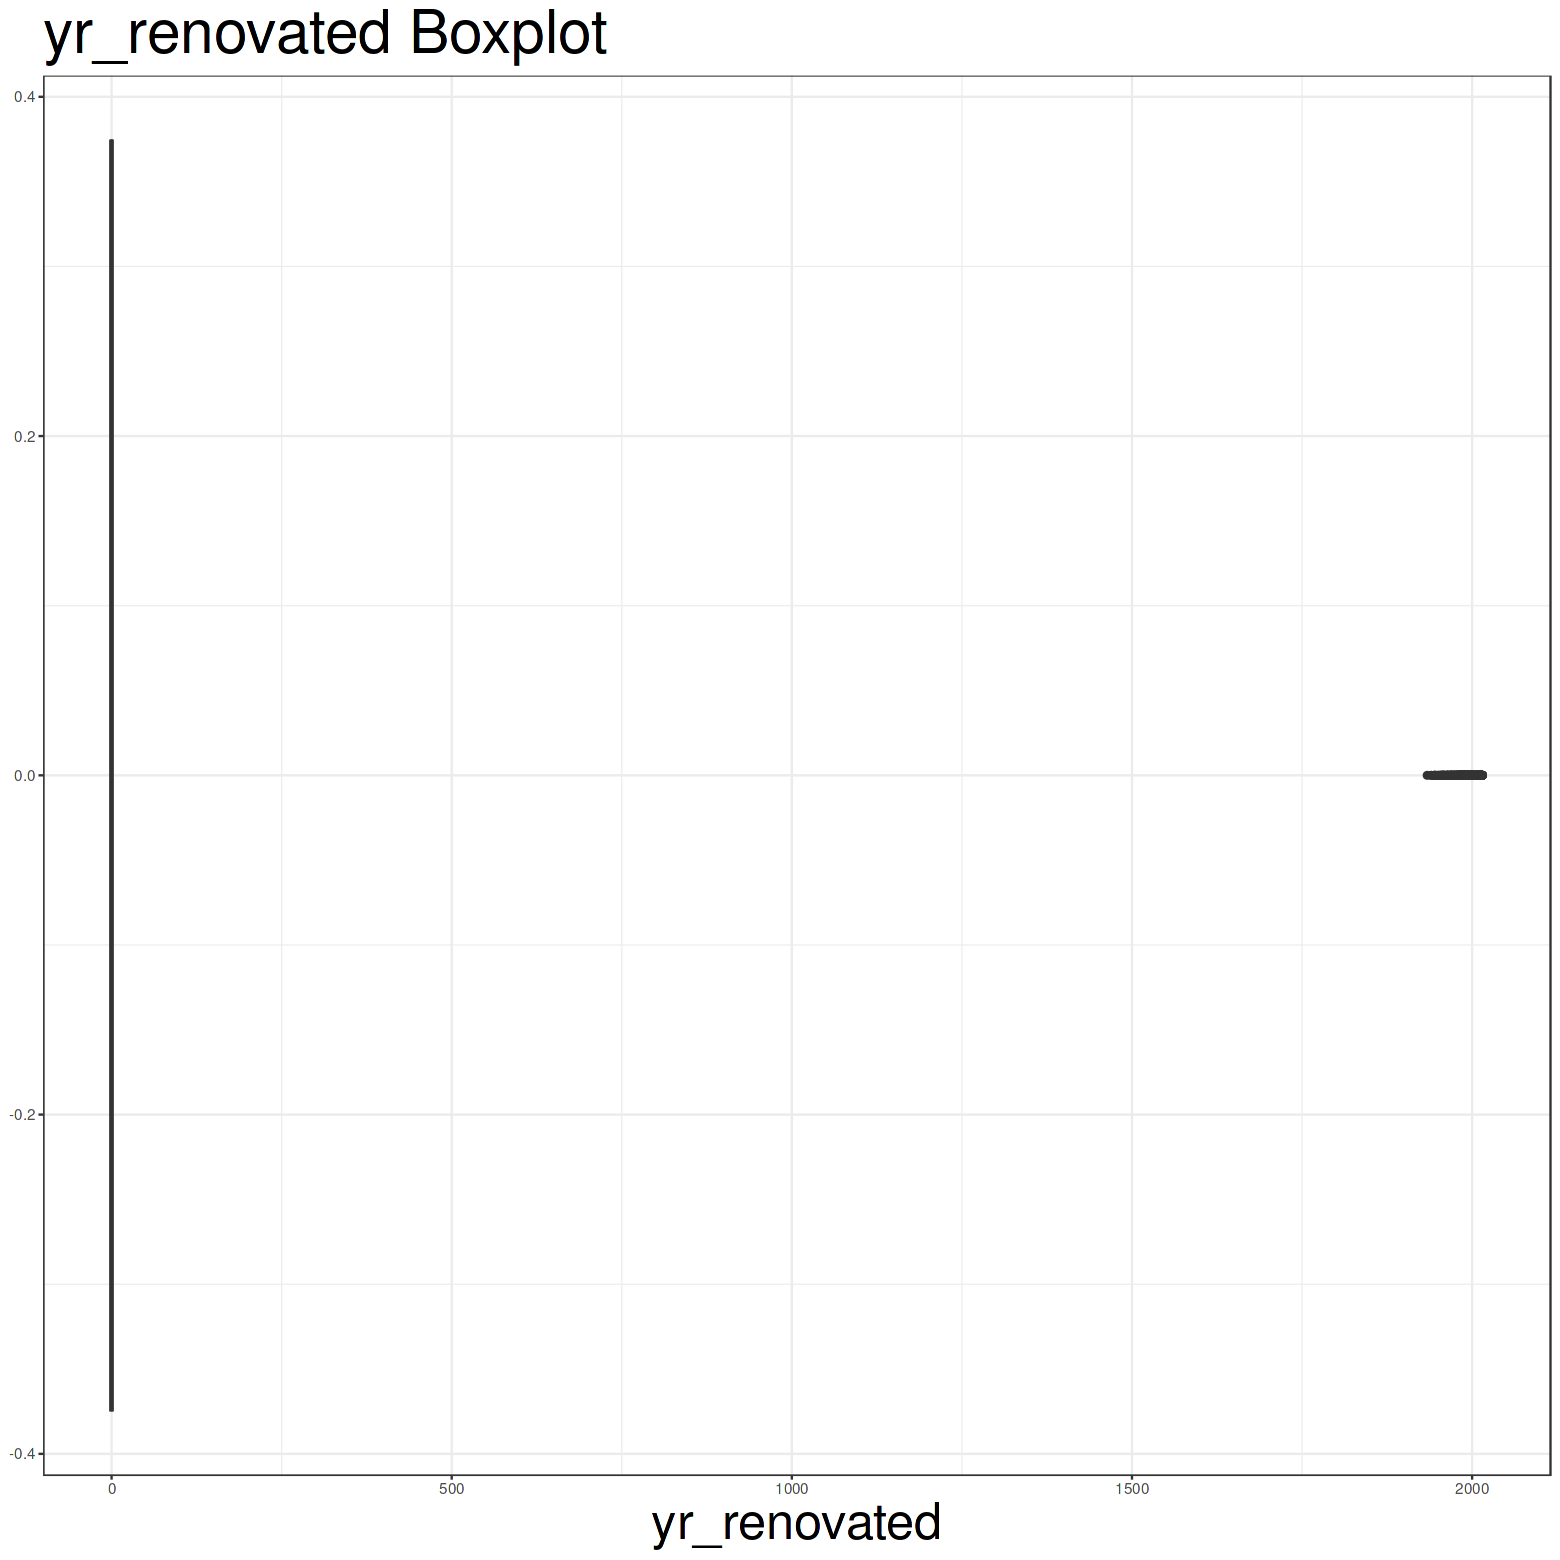

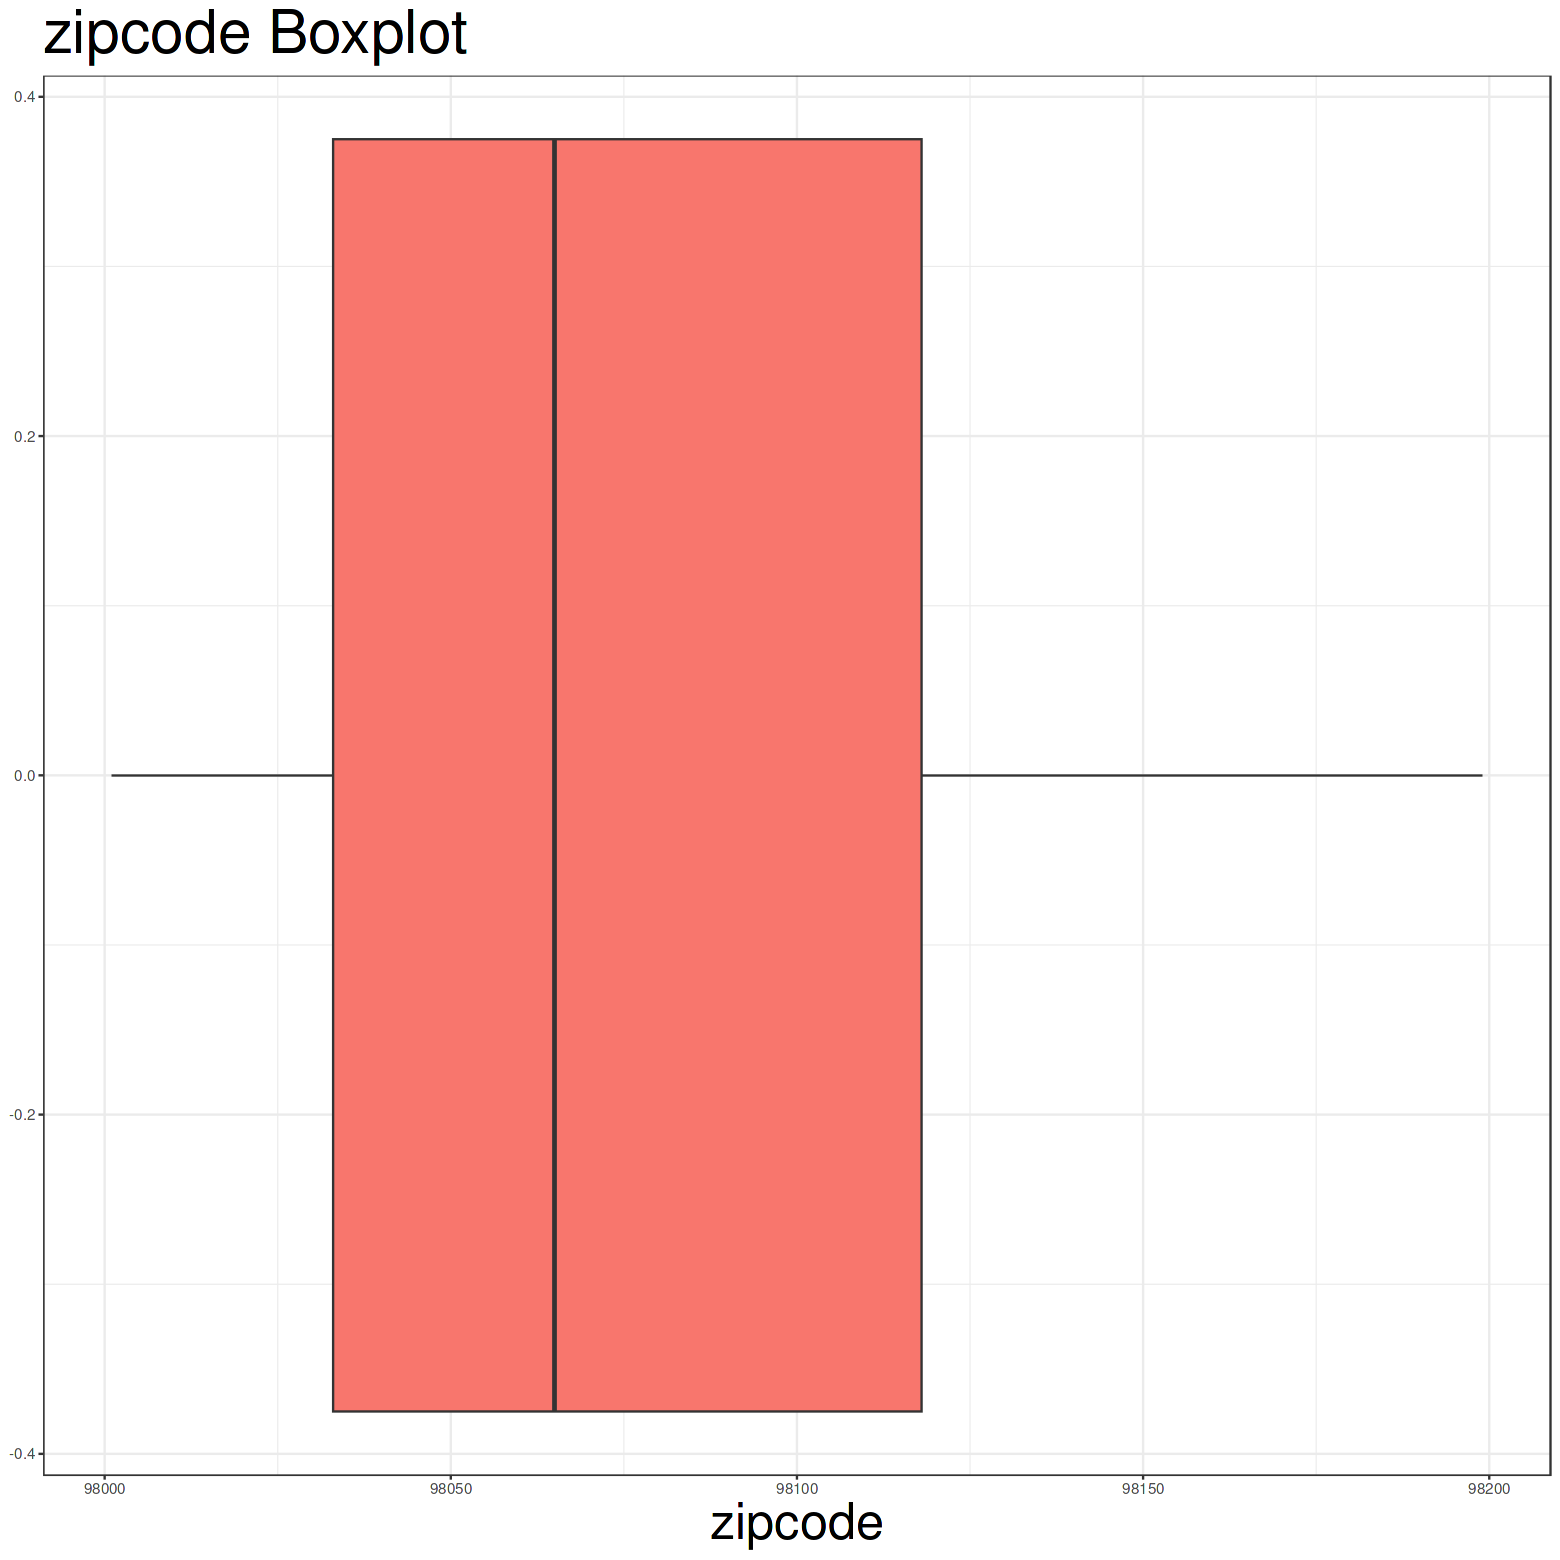

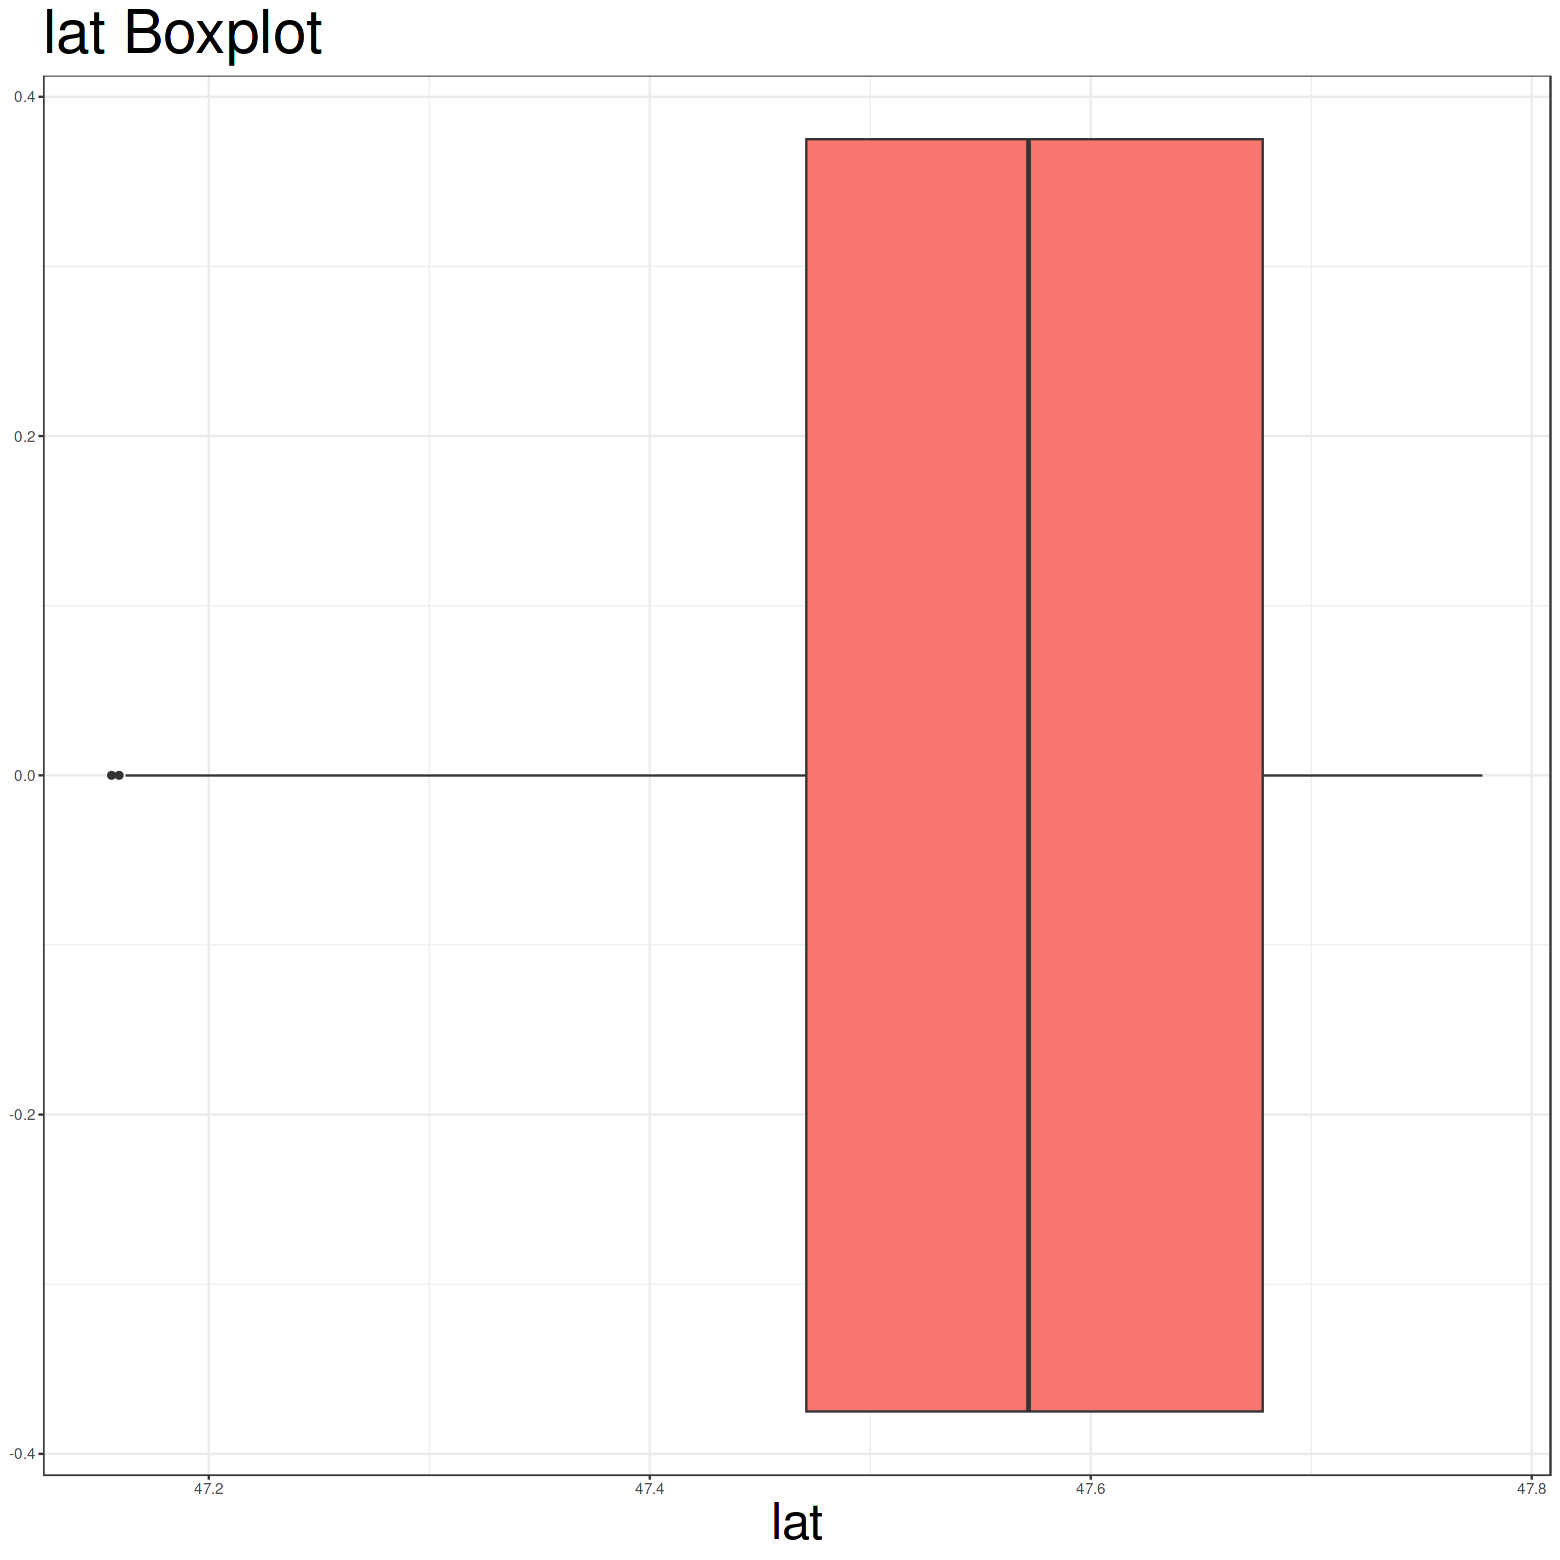

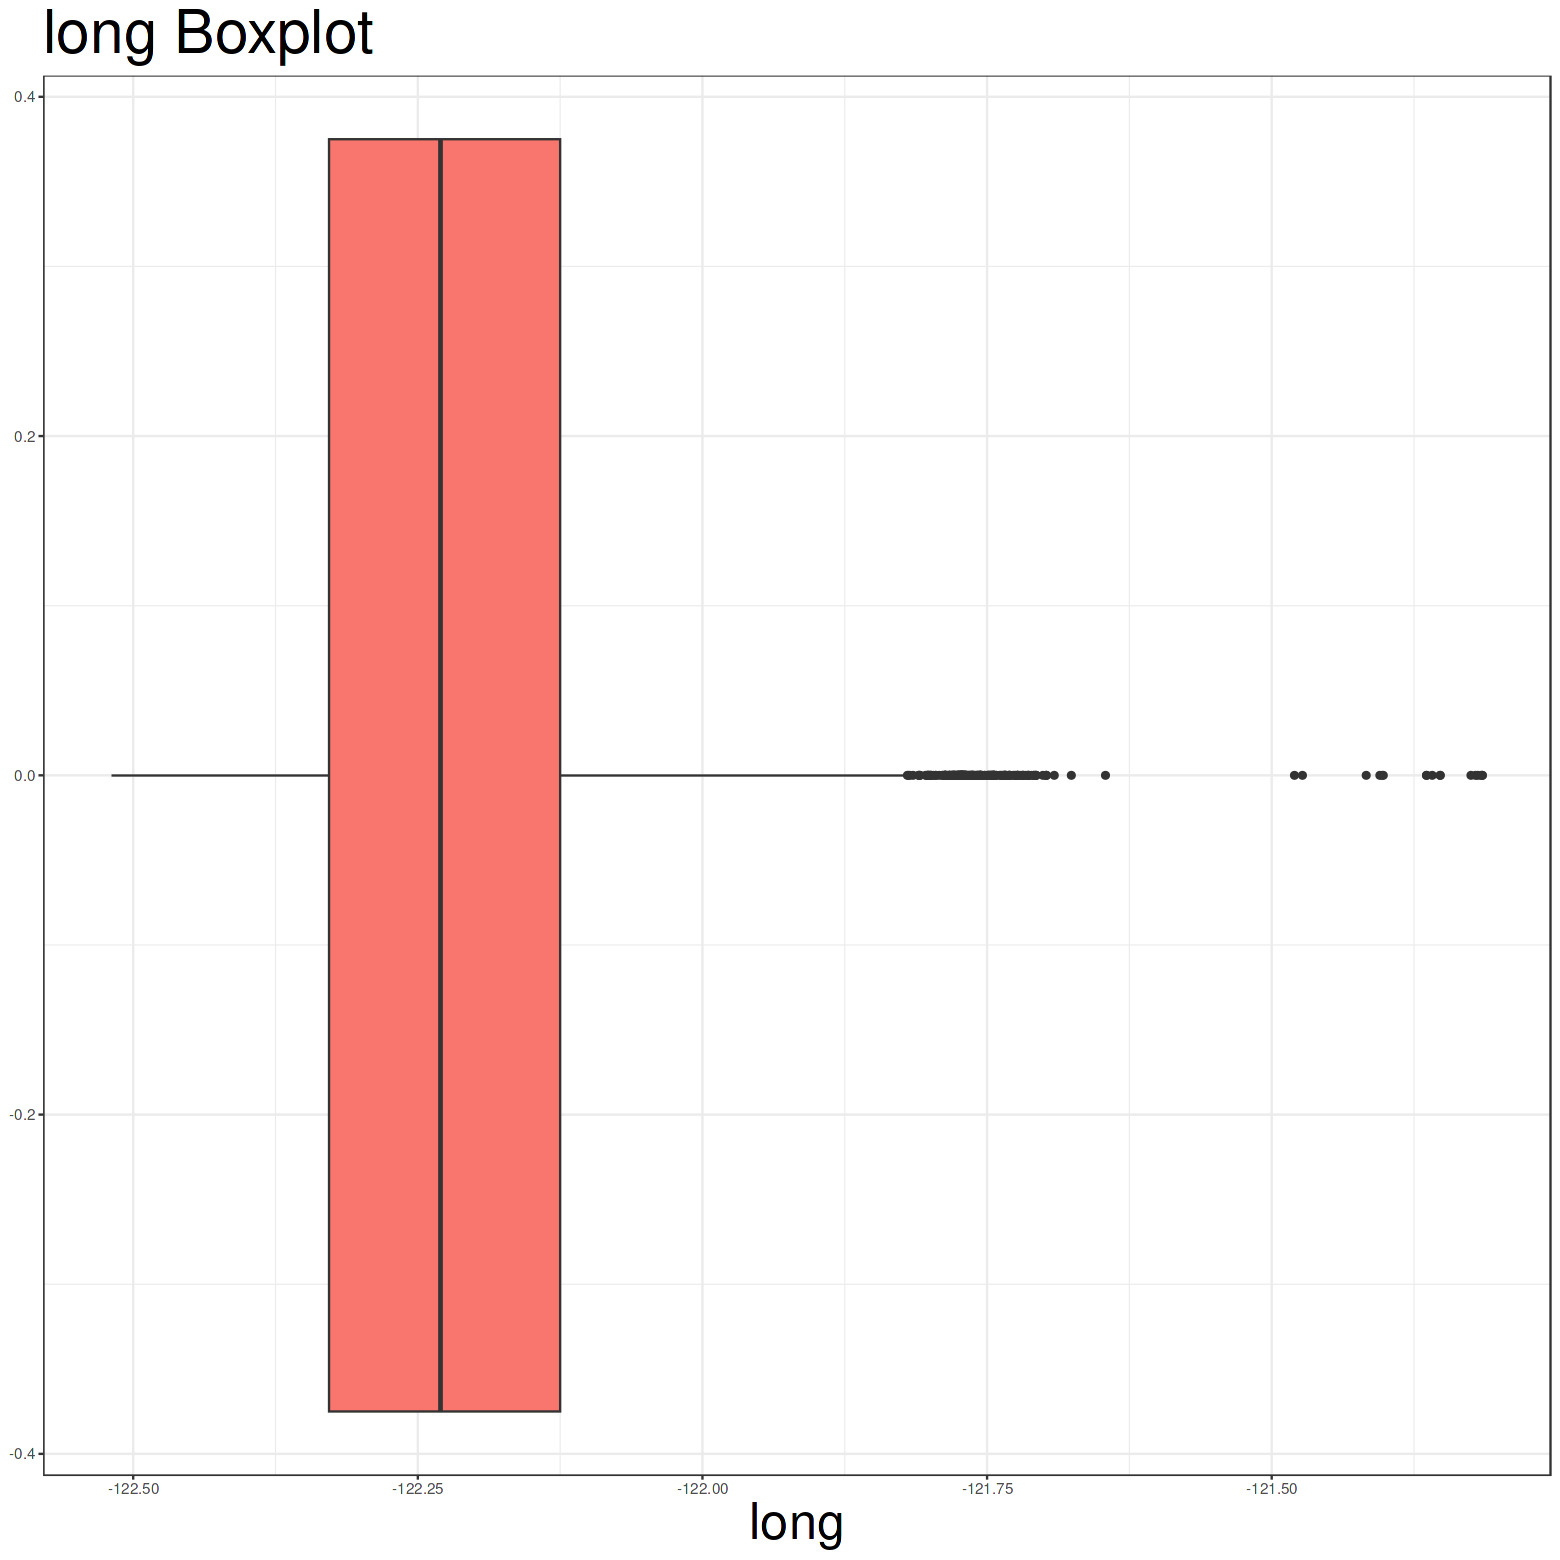

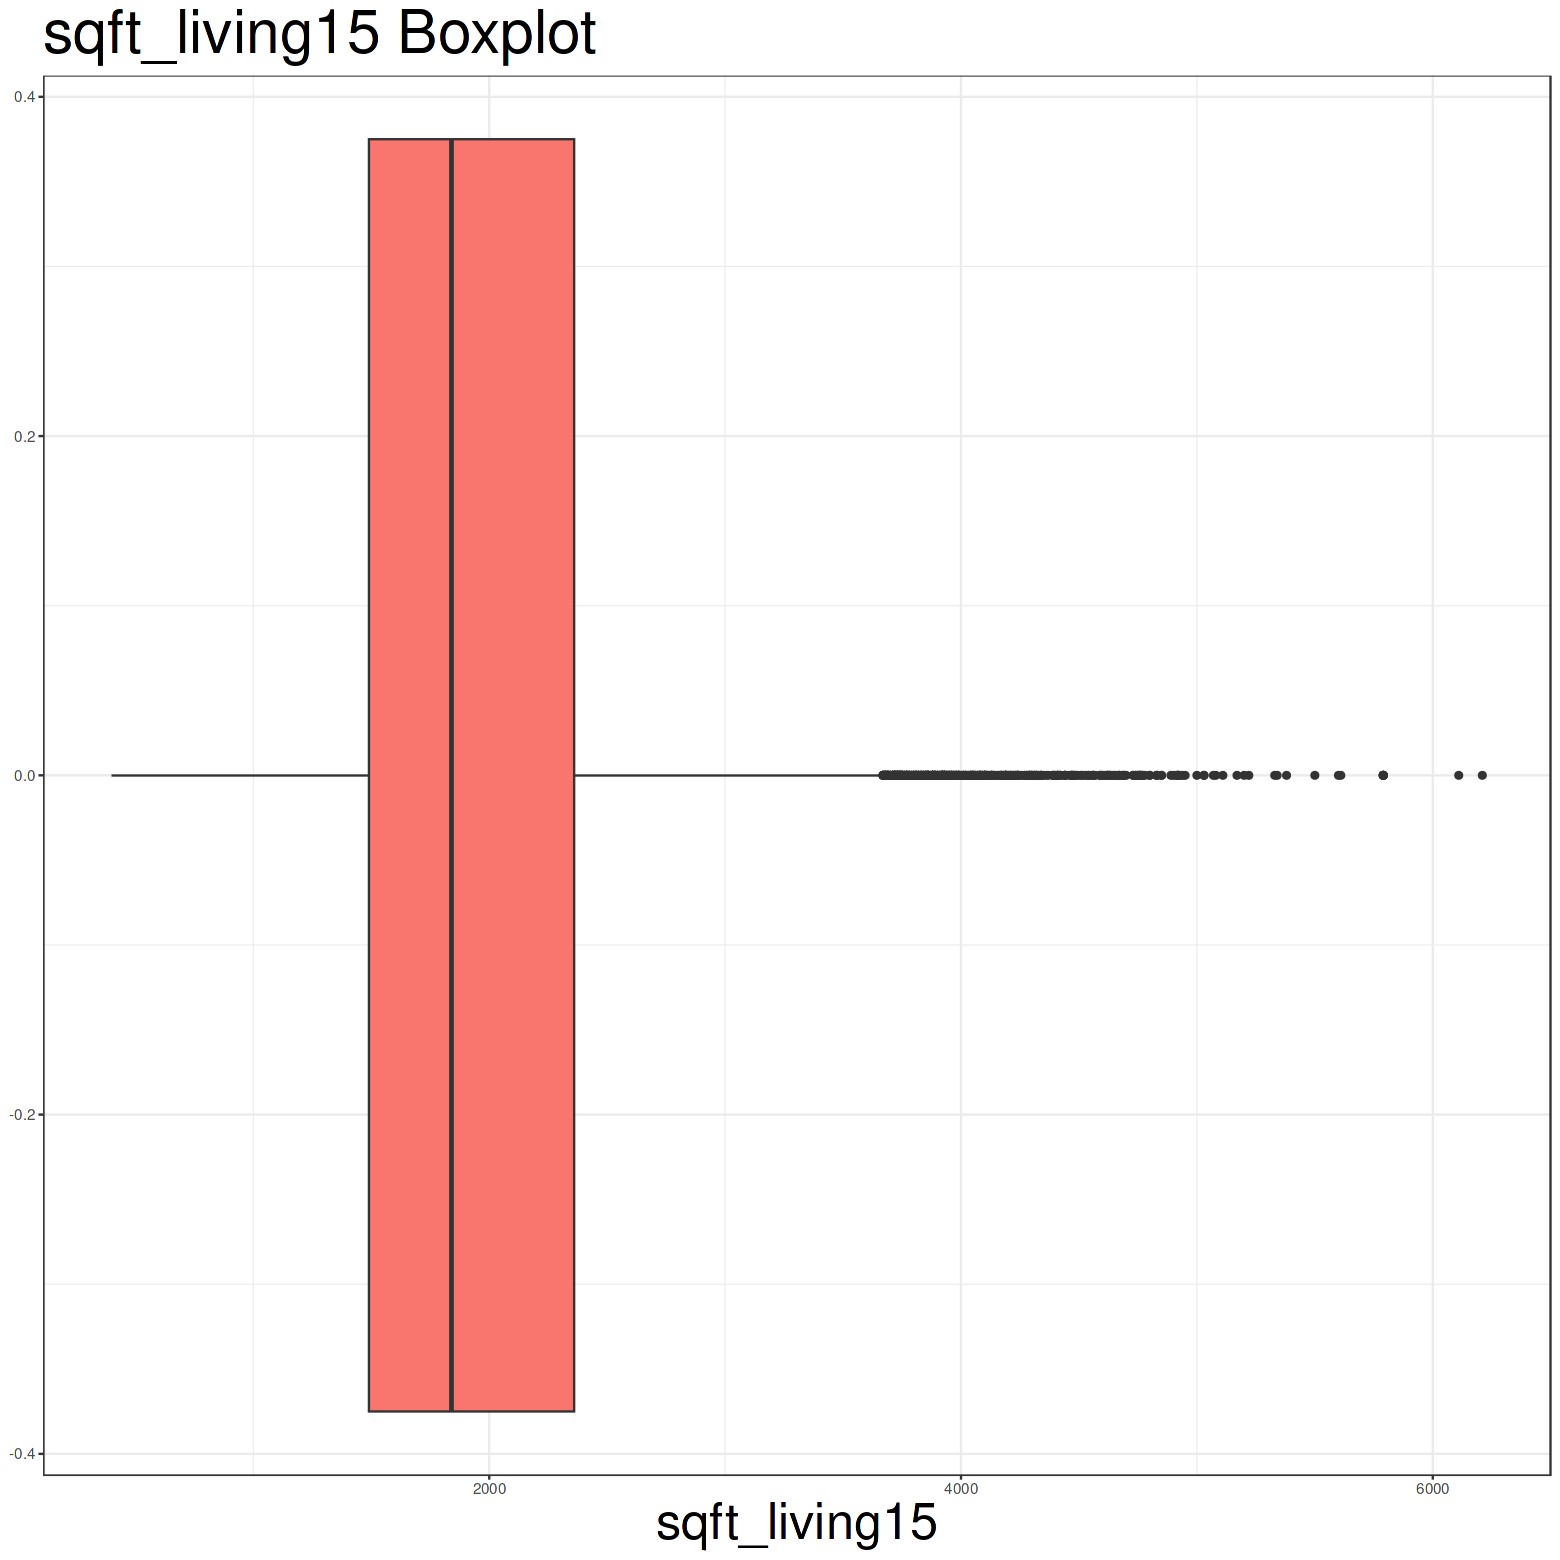

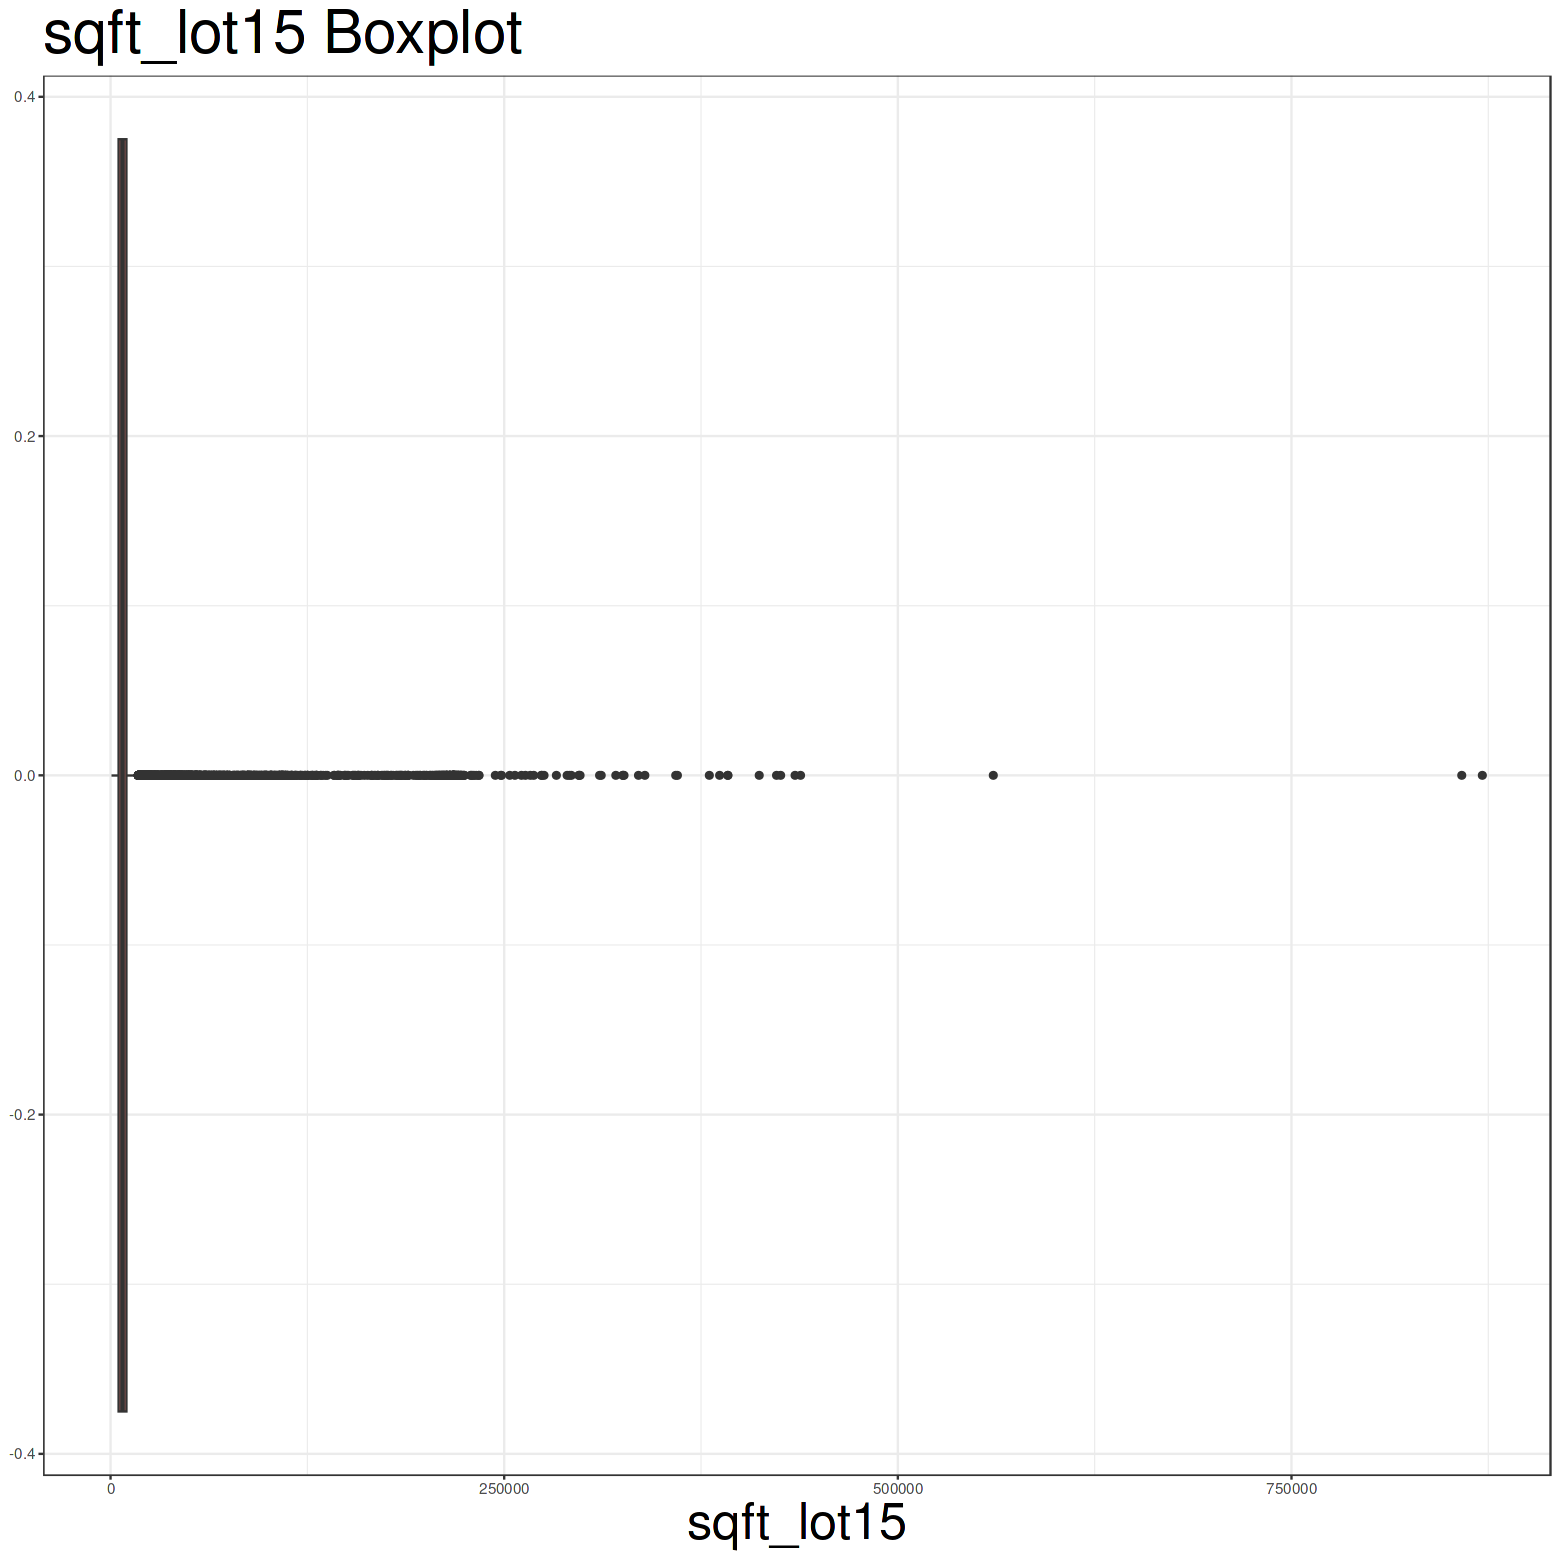

In [140]:
for (i in num_cols){
    print(ggplot(data) + geom_boxplot(aes(x= data[,i], fill = i)) +  ggtitle(paste0(i, ' Boxplot')) + xlab(i) + theme_bw()+ 
          theme(legend.position = 'none', axis.title = element_text(size=30), title = element_text(size=30)))
}

----------

**price by number of bedrooms and bathrooms**

In [141]:
bedsrooms_avgprice <- data %>% 
                    group_by(bedrooms) %>%
                    summarize(avg_price = mean(price,na.rm=T))

bathrooms_avgprice <- data %>% 
                    group_by(bathrooms) %>%
                    summarize(avg_price = mean(price,na.rm=T))


In [142]:
p1 <- ggplot(bedsrooms_avgprice) + geom_line(aes(x= bedrooms, y= avg_price),color = 'blue') + ggtitle('Average price by bedsroom') + 
                theme_bw() + theme(axis.title = element_text(size=20) , title = element_text(size=20))
p2 <- ggplot(bathrooms_avgprice) + geom_line(aes(x= bathrooms, y= avg_price), color = 'red') + ggtitle('Average price by bathroom') + 
                theme_bw() + theme(axis.title = element_text(size=20), title = element_text(size=20))

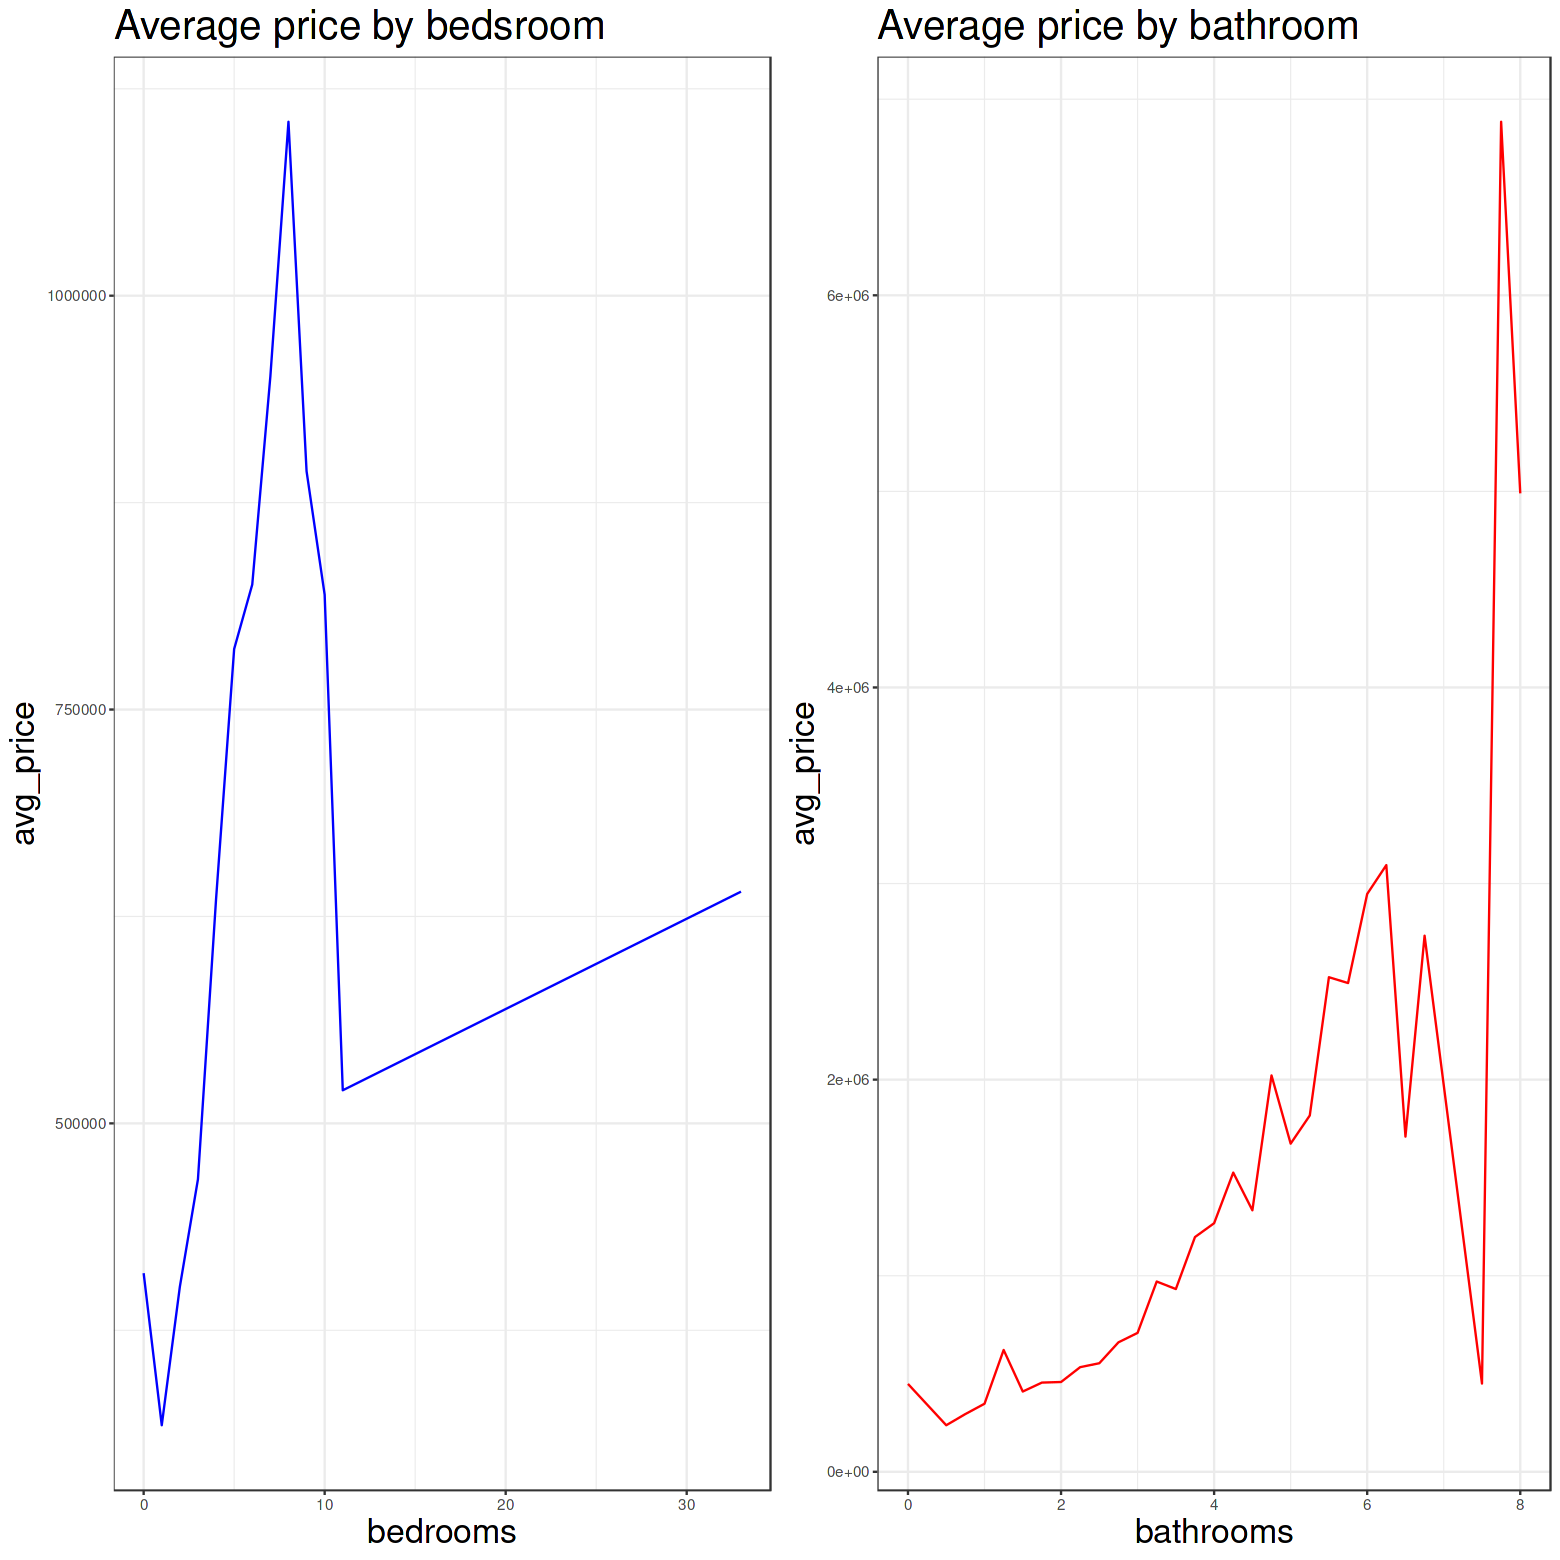

In [143]:
grid.arrange(p1,p2, ncol = 2)

----------------

**Change in average price by floor**

In [144]:
floor_avgprice <- data %>% 
                    group_by(floors) %>%
                    summarize(avg_price = mean(price,na.rm=T))

In [145]:
floor_avgprice

floors,avg_price
<dbl>,<dbl>
1.0,442181.5
1.5,558980.6
2.0,648891.2
2.5,1060346.5
3.0,582526.0
3.5,933312.5


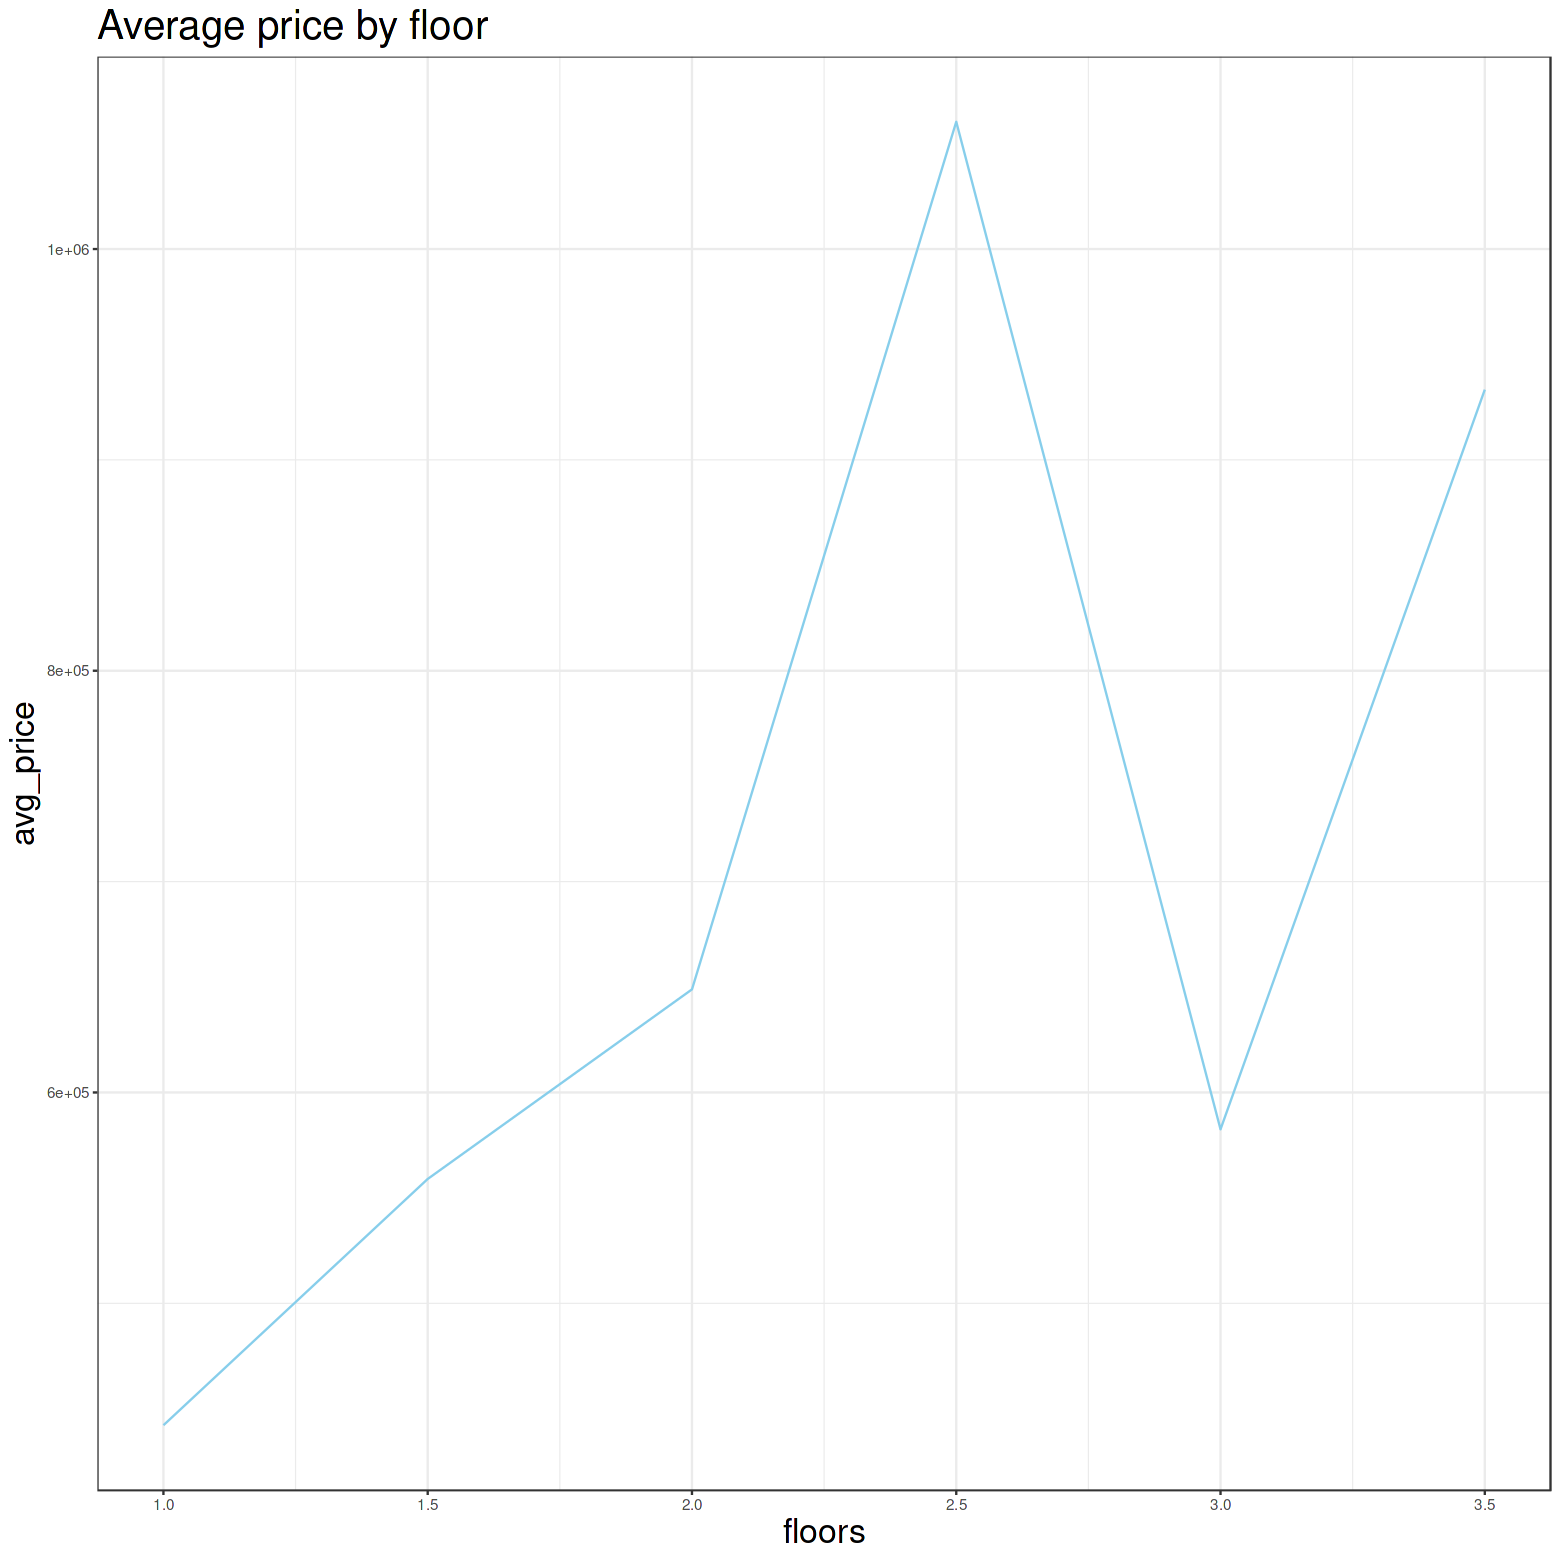

In [146]:
ggplot(floor_avgprice) + geom_line(aes(x= floors, y= avg_price),color = 'skyblue') + ggtitle('Average price by floor') + 
                theme_bw() + theme(axis.title = element_text(size=20) , title = element_text(size=20))

--------

**Changes in monthly average housing prices in 2014, 2015**

In [147]:
data2 <- data

data2$year <- year(data2$date)
data2$month <- month(data2$date)

In [148]:
avgprice_2014 <- data2 %>%
            filter(year == 2014) %>%
            group_by(month) %>%
            summarize(avg_price = mean(price, na.rm=T))

avgprice_2015 <- data2 %>%
            filter(year == 2015) %>%
            group_by(month) %>%
            summarize(avg_price = mean(price, na.rm=T))

In [149]:
avgprice_2014

month,avg_price
<dbl>,<dbl>
5,548080.3
6,558002.2
7,544788.8
8,536445.3
9,529253.8
10,539032.0
11,521961.0
12,524461.9


In [150]:
avgprice_2015

month,avg_price
<dbl>,<dbl>
1,525870.9
2,507851.4
3,543977.2
4,561837.8
5,558126.8


In [151]:
p1 <- ggplot(avgprice_2014) + 
        geom_line(aes(x= month , y= avg_price), color = 'red') + 
        geom_point(aes(x= month , y= avg_price), size=5) +
        ggtitle('Changes in monthly average housing prices in 2014') +
        theme_bw() + 
        theme(axis.title = element_text(size=20) , title = element_text(size=12))
        
p2 <- ggplot(avgprice_2015) + 
        geom_line(aes(x= month , y= avg_price), color = 'red') + 
        geom_point(aes(x= month , y= avg_price), size=5) +
        ggtitle('Changes in monthly average housing prices in 2015') +
        theme_bw() + 
        theme(axis.title = element_text(size=20) , title = element_text(size=12))

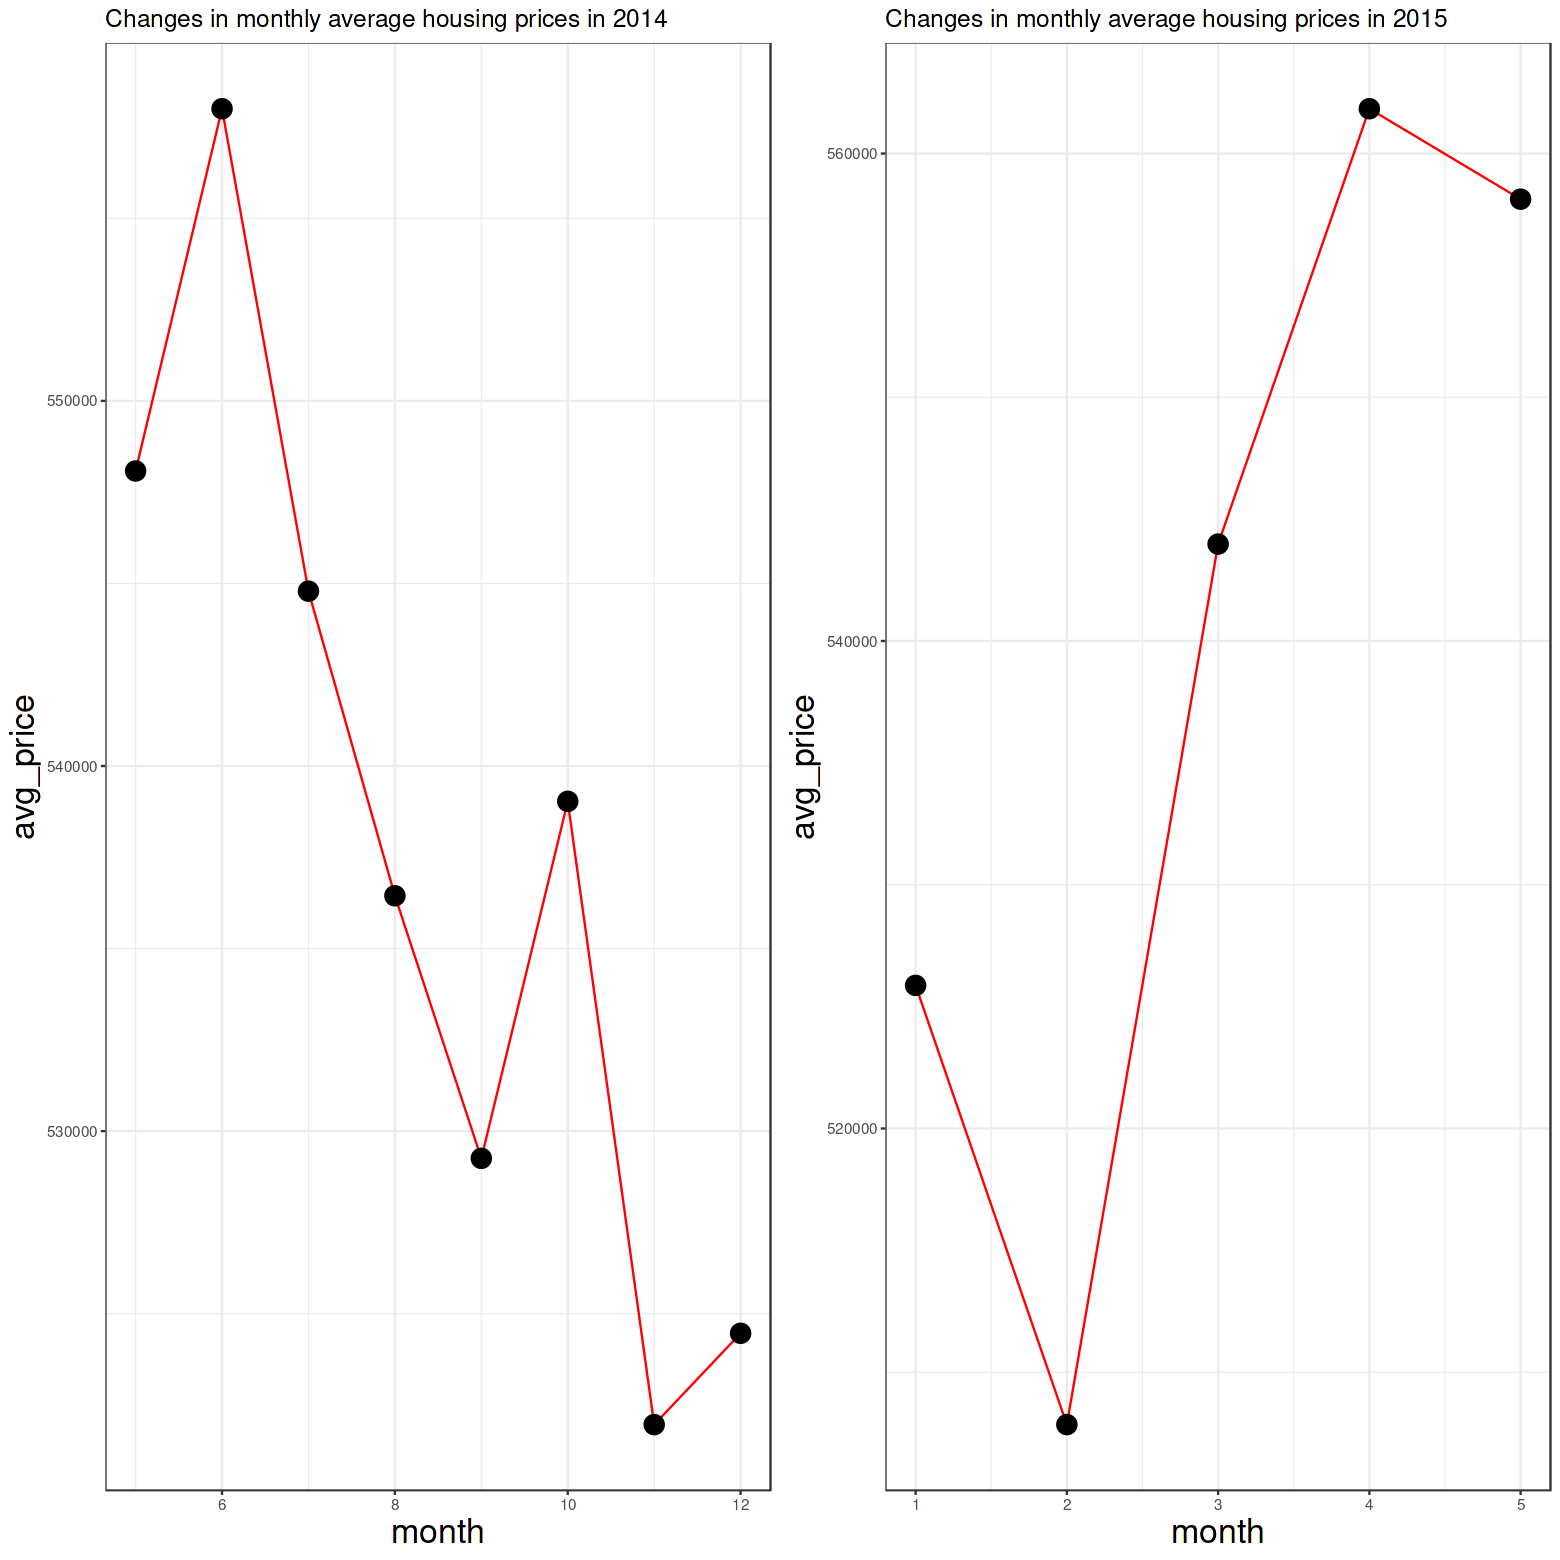

In [152]:
grid.arrange(p1,p2, ncol = 2)

-------

**Correlation**

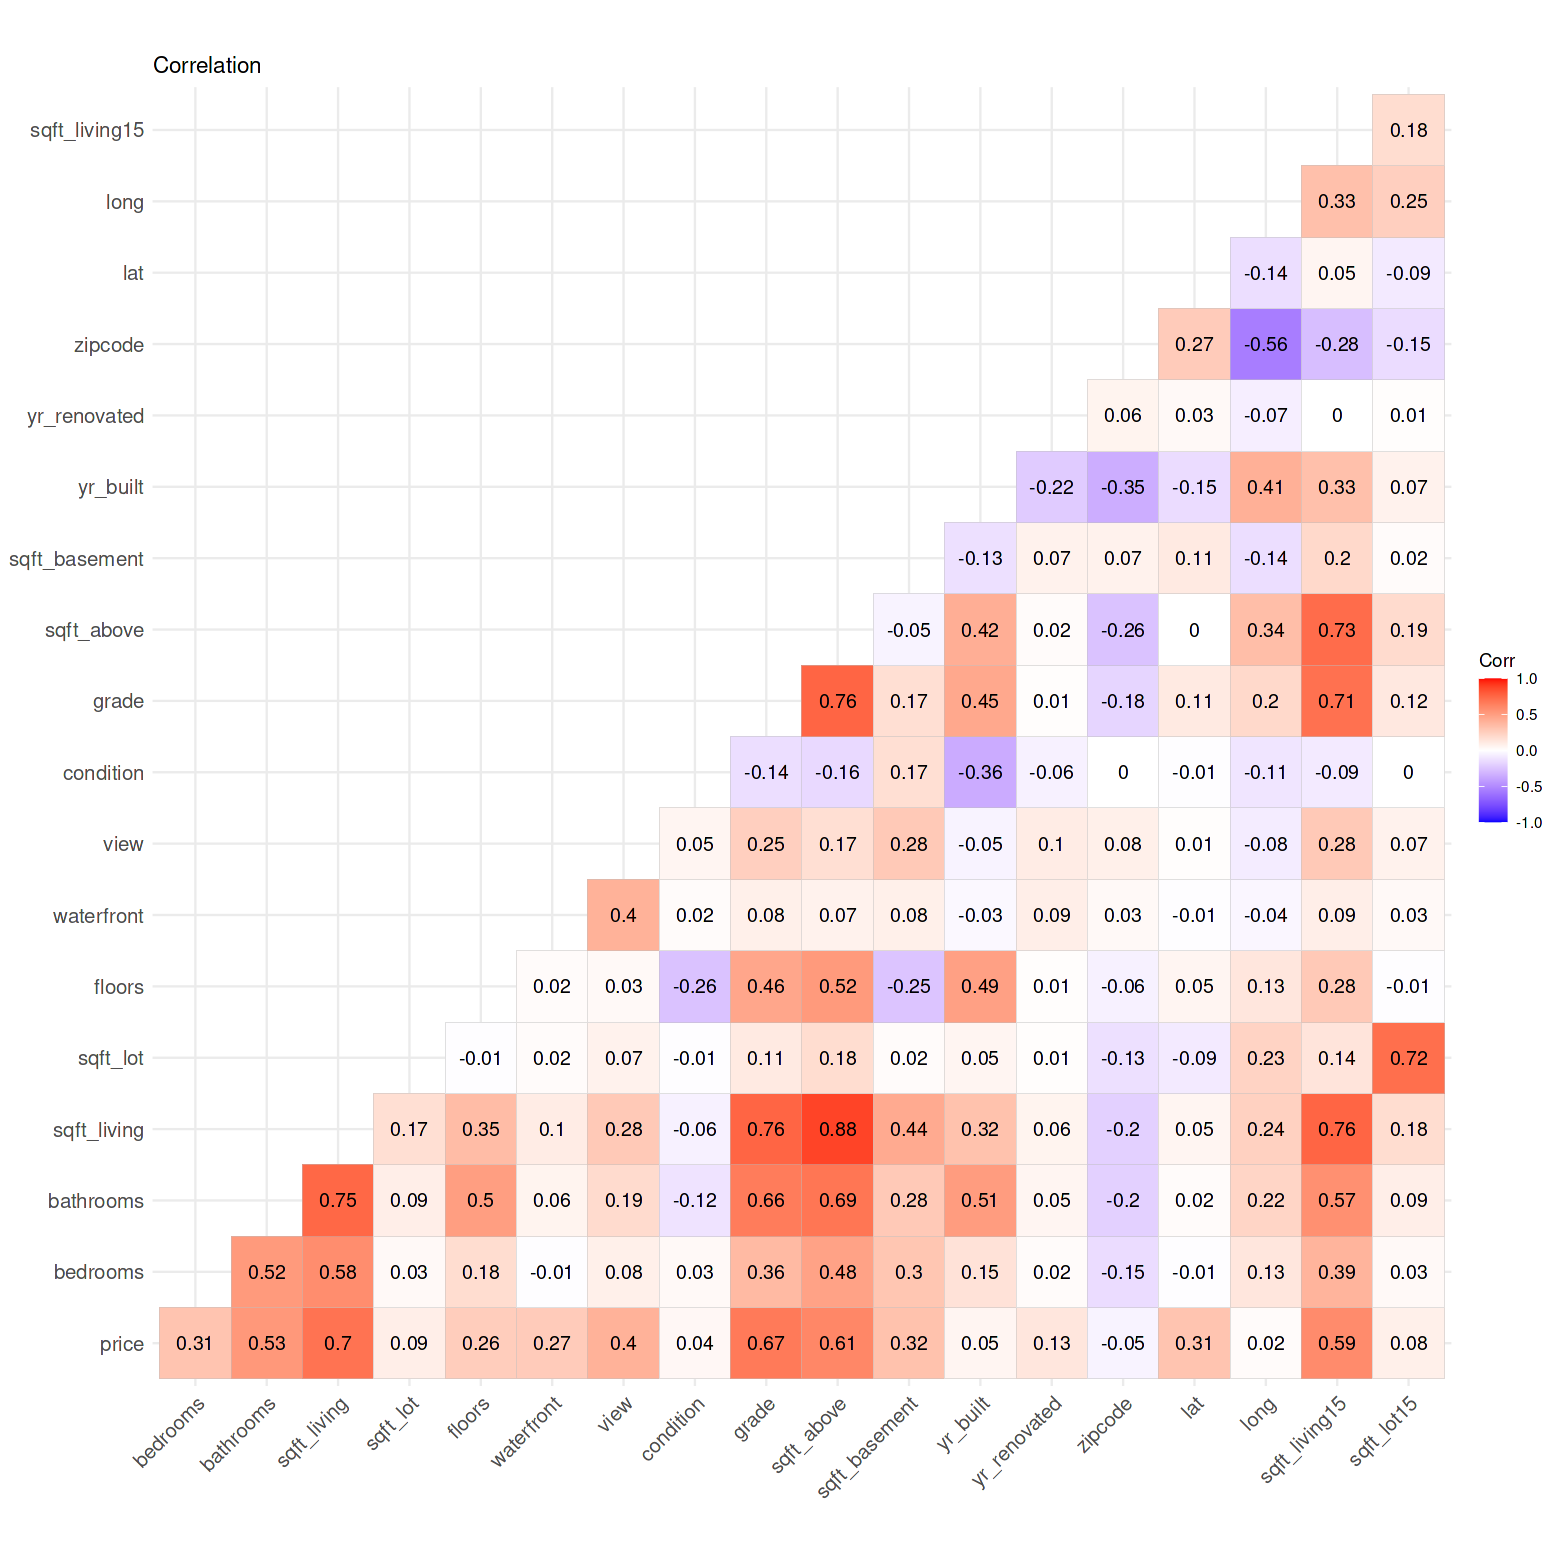

In [153]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [180]:
library(caret)
library(Metrics)
library(party)
library(randomForest)

**Linear Regression**

In [155]:
data <- data[,-c(1:2)]

In [163]:
minmax <- function(x){
    return ((x - min(x)) / (max(x)-min(x)))
}

In [164]:
data <- minmax(data)

In [165]:
LR <- lm(price ~., data = data)

In [166]:
summary(LR)


Call:
lm(formula = price ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16775 -0.01289 -0.00127  0.01008  0.56275 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.751e+01  5.223e-01 -33.525  < 2e-16 ***
bedrooms      -3.577e+04  1.892e+03 -18.906  < 2e-16 ***
bathrooms      4.115e+04  3.254e+03  12.646  < 2e-16 ***
sqft_living    1.501e+02  4.385e+00  34.227  < 2e-16 ***
sqft_lot       1.286e-01  4.792e-02   2.684  0.00729 ** 
floors         6.692e+03  3.596e+03   1.861  0.06274 .  
waterfront     5.830e+05  1.736e+04  33.580  < 2e-16 ***
view           5.287e+04  2.140e+03  24.706  < 2e-16 ***
condition      2.639e+04  2.351e+03  11.222  < 2e-16 ***
grade          9.589e+04  2.153e+03  44.541  < 2e-16 ***
sqft_above     3.113e+01  4.360e+00   7.138 9.74e-13 ***
sqft_basement         NA         NA      NA       NA    
yr_built      -2.620e+03  7.266e+01 -36.062  < 2e-16 **

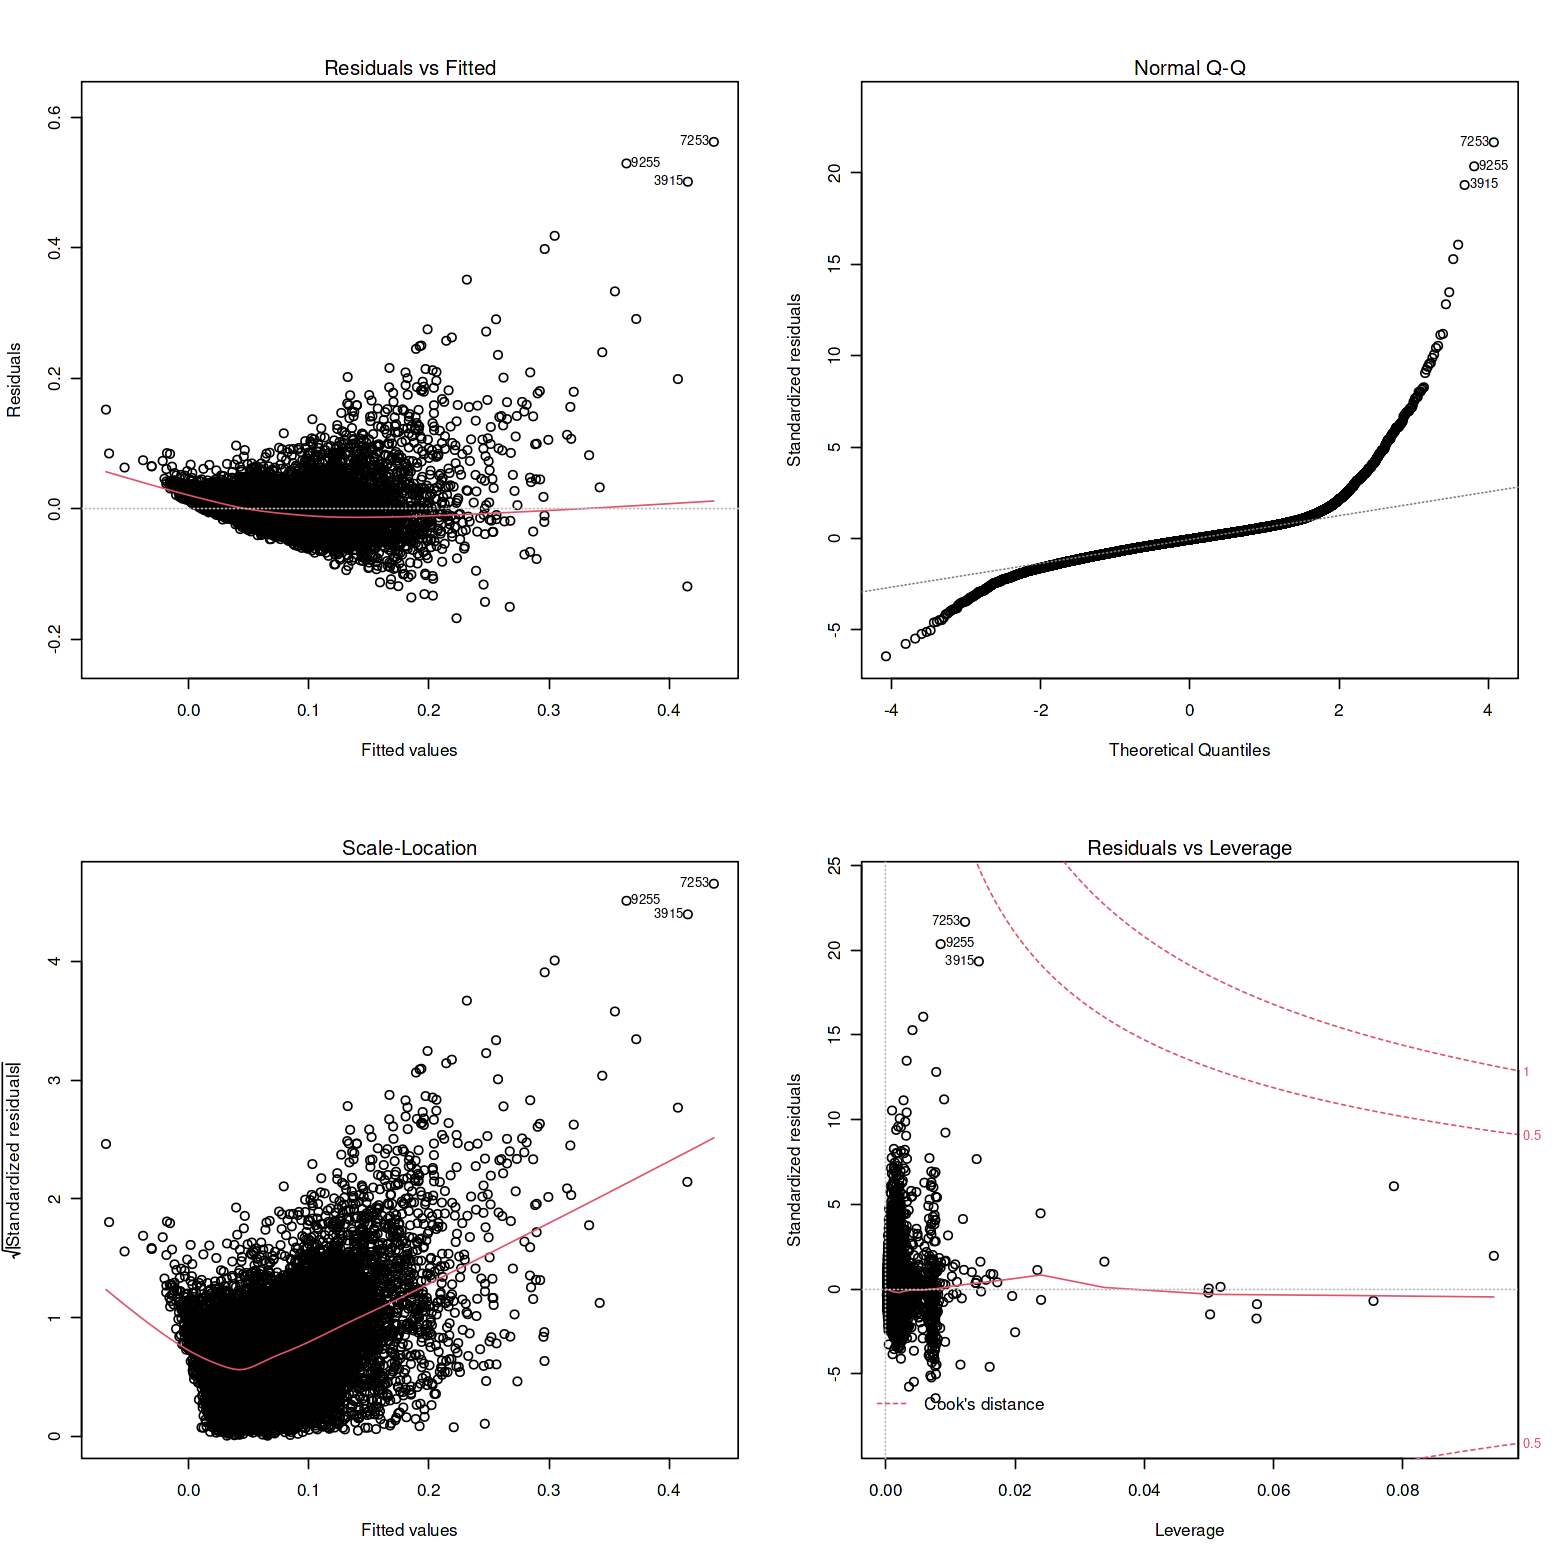

In [167]:
par(mfrow=c(2,2))
plot(LR)

In [168]:
bestlr <- step(LR, direction='both')

Start:  AIC=-157517.2
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + 
    waterfront + view + condition + grade + sqft_above + sqft_basement + 
    yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + 
    sqft_lot15


Step:  AIC=-157517.2
price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + 
    waterfront + view + condition + grade + sqft_above + yr_built + 
    yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15

                Df Sum of Sq    RSS     AIC
<none>                       14.751 -157517
- floors         1   0.00237 14.753 -157516
- sqft_lot       1   0.00492 14.756 -157512
- sqft_lot15     1   0.01863 14.770 -157492
- yr_renovated   1   0.02007 14.771 -157490
- sqft_living15  1   0.02702 14.778 -157480
- sqft_above     1   0.03481 14.786 -157468
- condition      1   0.08601 14.837 -157394
- bathrooms      1   0.10924 14.860 -157360
- long           1   0.18260 14.934 -157253
- zipcode        1   0.21300 14.964 -1572

In [173]:
summary(bestlr)


Call:
lm(formula = price ~ bedrooms + bathrooms + sqft_living + sqft_lot + 
    floors + waterfront + view + condition + grade + sqft_above + 
    yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + 
    sqft_lot15, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16775 -0.01289 -0.00127  0.01008  0.56275 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.751e+01  5.223e-01 -33.525  < 2e-16 ***
bedrooms      -3.577e+04  1.892e+03 -18.906  < 2e-16 ***
bathrooms      4.115e+04  3.254e+03  12.646  < 2e-16 ***
sqft_living    1.501e+02  4.385e+00  34.227  < 2e-16 ***
sqft_lot       1.286e-01  4.792e-02   2.684  0.00729 ** 
floors         6.692e+03  3.596e+03   1.861  0.06274 .  
waterfront     5.830e+05  1.736e+04  33.580  < 2e-16 ***
view           5.287e+04  2.140e+03  24.706  < 2e-16 ***
condition      2.639e+04  2.351e+03  11.222  < 2e-16 ***
grade          9.589e+04  2.153e+03  44.541  < 2e-16 ***
sqft_above 

In [174]:
pred <- predict(bestlr,data)

In [177]:
cat('mse : ',mse(data$price, pred),'\n')
cat('rmse : ',rmse(data$price,pred),'\n')
cat('mae : ',mae(data$price, pred),'\n')
cat('r2 : ',R2(data$price, pred))

mse :  0.0006825034 
rmse :  0.02612477 
mae :  0.01635336 
r2 :  0.6997466

-------

**RandomForest Regression**

In [181]:
RF <- randomForest(price~., data = data, ntree= 300)

In [186]:
RF


Call:
 randomForest(formula = price ~ ., data = data, ntree = 300) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 6

          Mean of squared residuals: 0.0002708344
                    % Var explained: 88.09

In [183]:
pred <- predict(RF,data)

In [184]:
cat('mse : ',mse(data$price, pred),'\n')
cat('rmse : ',rmse(data$price,pred),'\n')
cat('mae : ',mae(data$price, pred),'\n')
cat('r2 : ',R2(data$price, pred))

mse :  5.148566e-05 
rmse :  0.007175351 
mae :  0.003839239 
r2 :  0.9797888

# **5. Evaluation**

**Random Forest is a better model because MAE, MSE are small.**

------------

**Please leave your advice in the comments. Thank you**